<a href="https://colab.research.google.com/github/FranciscaHM/Proyecto/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install amuse-framework

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.2/679.2 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools_scm-8.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools_scm-8.1.0-py3-none-any.whl (43 kB)
  Created wheel for amuse-framework: filename=amuse_framework-2024.6.0-py3-none-any.whl size=629891 sha256=d4d3e27832597180b27eff3493decc1710e9445c14cfd280c316599bba68f396
  Stored in directory: /root/.cache/pip/wheels/96/a7/96/08b4505f65a31c950a9ef03d5cf092aaa1b151d1bdd9b30503
Successfully built amuse-framework


In [2]:
import scipy as sp
import astropy as ap
import pandas as pd
import seaborn as cbrn
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from amuse.units import units
from amuse.io import read_set_from_file
from amuse.datamodel import Particles, particles
from amuse.lab import read_set_from_file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Guardamos los datos en listas.

In [4]:
#Primero guardamos todos los path.
path_carpeta = '/content/drive/MyDrive/sim'
stars = []
gas = []
for i in range(1,91):
  stars.append(path_carpeta+f'/stars_{i}')
  gas.append(path_carpeta+f'/gas_{i}')

#Ahora los abrimos con read_set_from_file y los guardamos en una lista.
star_data = []
for elemento in stars:
  star_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

gas_data = []
for elemento in gas:
  gas_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

Conozcamos los atributos.

In [15]:
star_data[0].all_attributes()

['key',
 'mass',
 'potential_in_code',
 'radius',
 'timestep',
 'vx',
 'vy',
 'vz',
 'x',
 'y',
 'z',
 'total_mass',
 'rotate',
 'get_binaries',
 'center_of_mass_velocity',
 'oblateness',
 'new_particle_from_cluster_core',
 'total_angular_momentum',
 'mass_segregation_from_nearest_neighbour',
 'angular_momentum',
 'box_counting_dimension',
 'minimum_spanning_tree_length',
 'virial_radius',
 'correlation_dimension',
 'position',
 'densitycentre_coreradius_coredens',
 'acceleration',
 'Qparameter',
 'mass_segregation_Gini_coefficient',
 'center_of_mass',
 'total_momentum',
 'velocity',
 'add_spin',
 'moment_of_inertia',
 'kinetic_energy',
 'cluster_core',
 'thermal_energy',
 'potential_energy',
 'LagrangianRadii',
 'connected_components',
 'total_radius',
 'binaries',
 'specific_kinetic_energy',
 'nearest_neighbour',
 'scale_to_standard',
 'find_closest_particle_to',
 'potential_energy_in_field',
 'potential',
 'bound_subset',
 'mass_segregation_ratio',
 'distances_squared',
 'natal_kick

In [16]:
help(star_data[0].x)

Help on VectorQuantity in module amuse.units.quantities object:

class VectorQuantity(Quantity)
 |  VectorQuantity(array, unit)
 |  
 |  A VectorQuantity object represents a physical vector
 |  quantity.
 |  
 |  >>> from amuse.units import units
 |  >>> v1 = [0.0, 1.0, 2.0] | units.kg
 |  >>> v2 = [2.0, 4.0, 6.0] | units.kg
 |  >>> v1 + v2
 |  quantity<[2.0, 5.0, 8.0] kg>
 |  >>> len(v1)
 |  3
 |  
 |  Method resolution order:
 |      VectorQuantity
 |      Quantity
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |      Return the "index" component as a quantity.
 |      
 |      :argument index: index of the component, valid values
 |          for 3 dimensional vectors are: ``[0,1,2]``
 |      :returns: quantity with the same units
 |      
 |      >>> from amuse.units import si
 |      >>> vector = [0.0, 1.0, 2.0] | si.kg
 |      >>> print vector[1]
 |      1.0 kg
 |      >>> print vector[0:2]
 |      [0.0, 1.0] kg
 |      >>> print vector[[

Calculamos el centro de masa!

In [5]:
def r6(particles, indice):
  x0 = particles[indice].x
  y0 = particles[indice].y
  z0 = particles[indice].z
  d = ((particles.x-x0)**2+(particles.y-y0)**2+(particles.z-z0)**2).sqrt()
  return np.sort(d.value_in(units.parsec))[6]

CMs=[]
for j in range(0,len(star_data)):
  up = 0
  down = 0
  for i in range(0,len(star_data[j])):
    r6i = r6(star_data[j],i)
    up += (star_data[j][i].x.value_in(units.parsec), star_data[j][i].y.value_in(units.parsec), star_data[j][i].z.value_in(units.parsec))/r6i**3
    down += 1/r6i**3
  r = up/down
  CMs.append(r)

CMg=[]
for j in range(0,len(gas_data)):
  up = 0
  down = 0
  for i in range(0,len(gas_data[j])):
    r6i = r6(gas_data[j],i)
    up += (gas_data[j][i].x.value_in(units.parsec), gas_data[j][i].y.value_in(units.parsec), gas_data[j][i].z.value_in(units.parsec))/r6i**3
    down += 1/r6i**3
  r = up/down
  CMg.append(r)


In [7]:
(CMs[0][0],CMs[0][1])

(-0.013026688641547796, -0.0025352557673539514)

In [8]:
(CMg[0][0],CMg[0][1])

(1.0020534728598915, 0.49997491965255314)

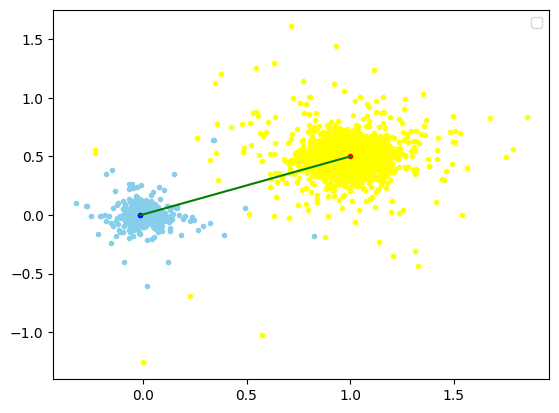

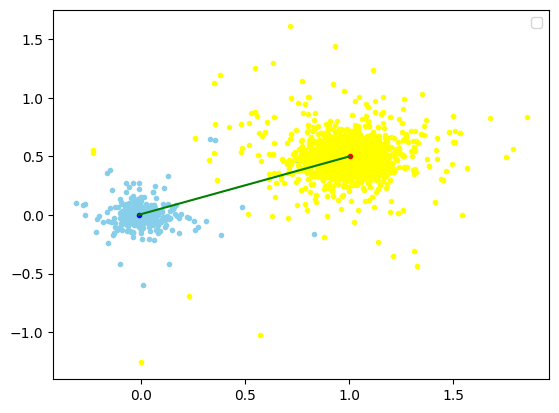

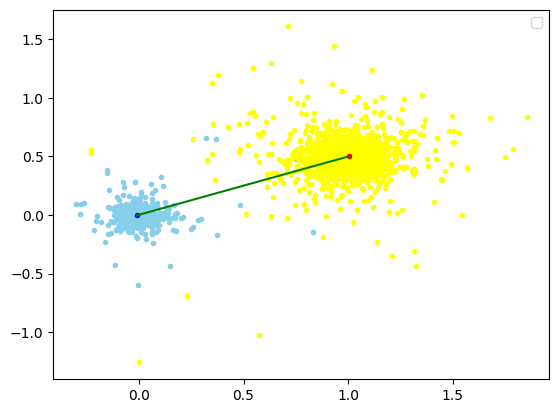

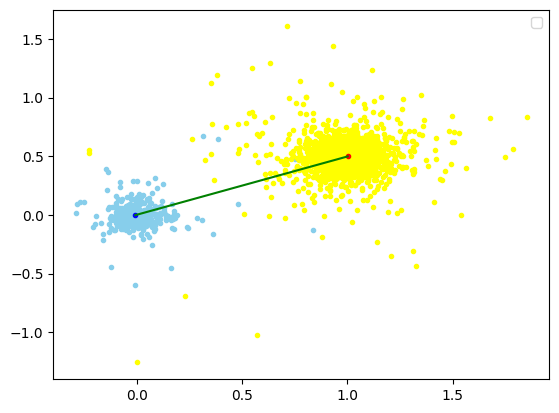

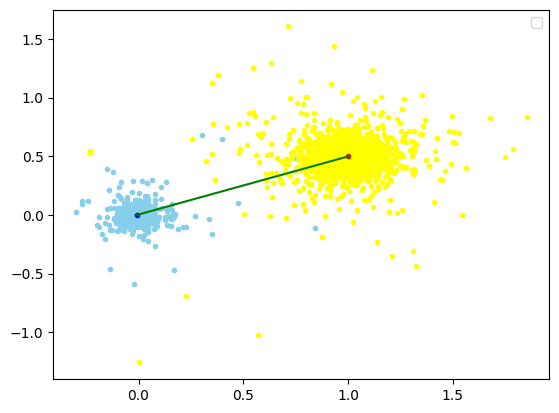

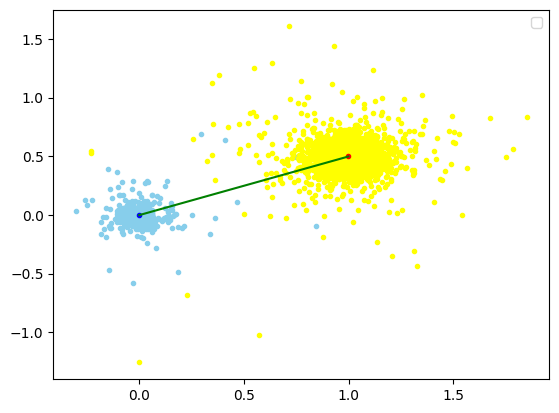

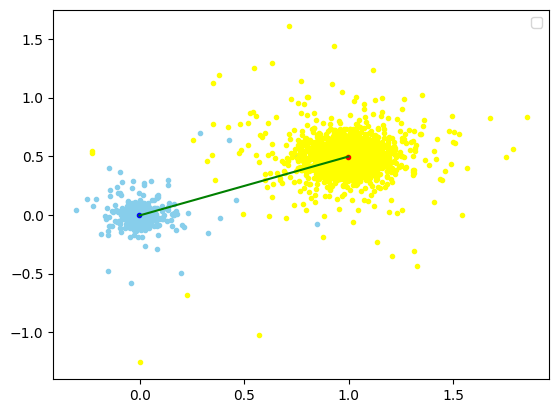

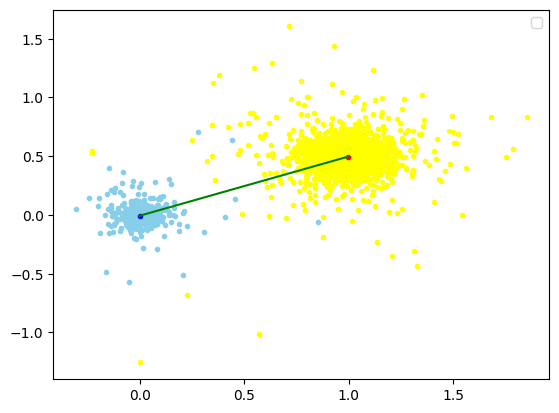

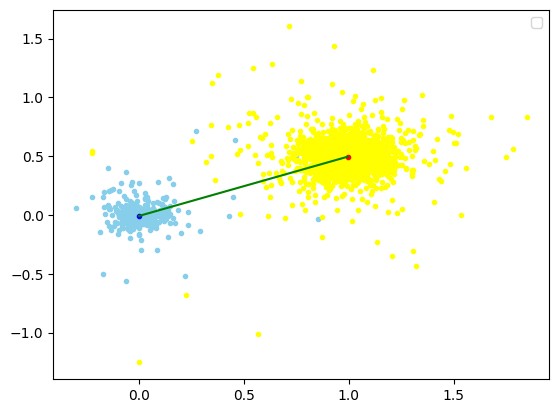

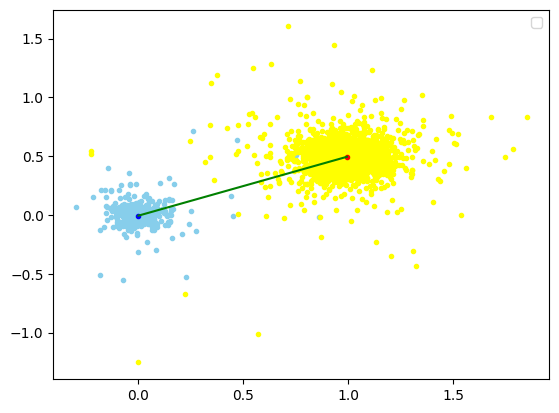

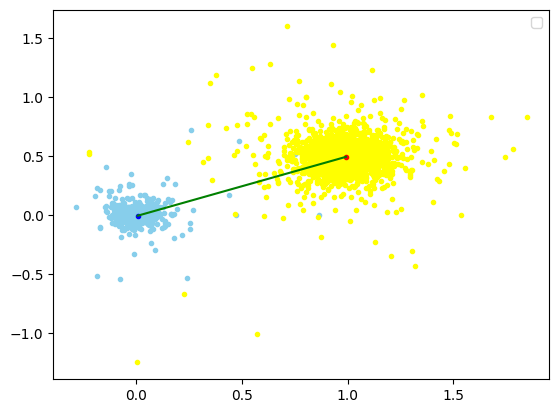

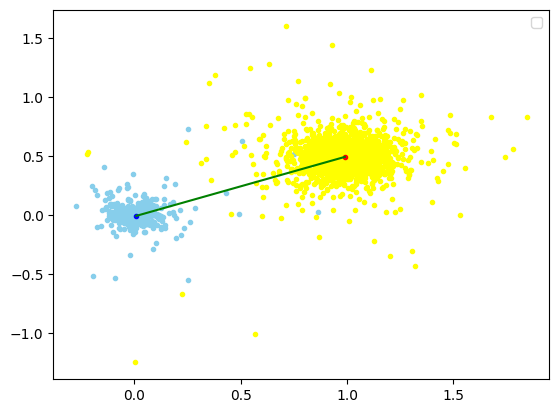

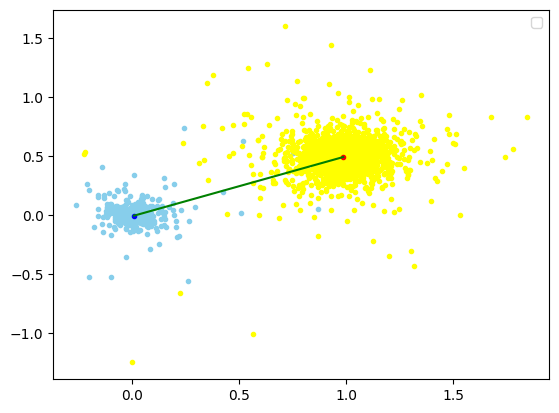

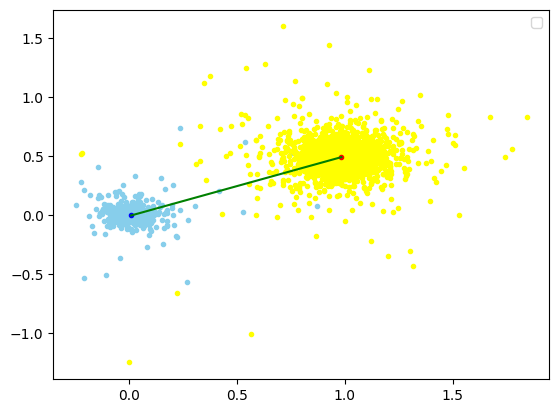

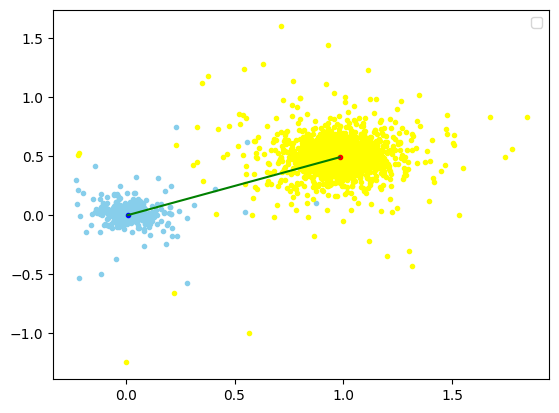

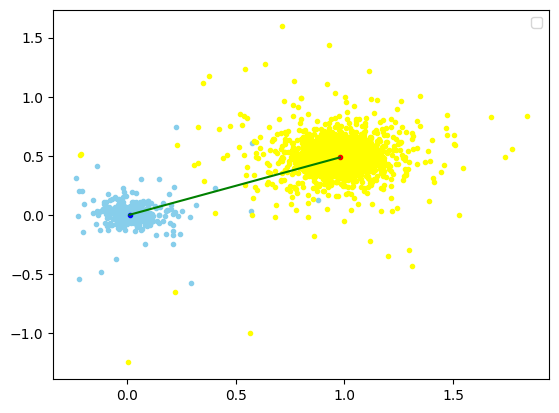

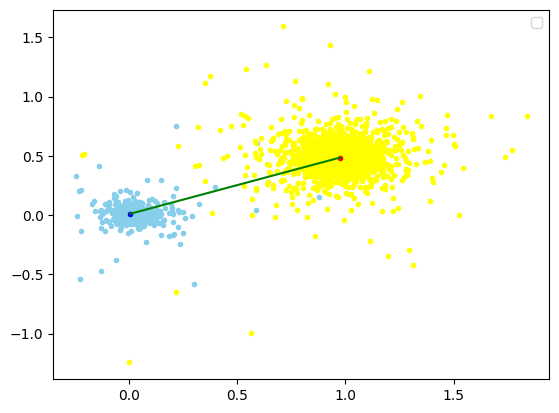

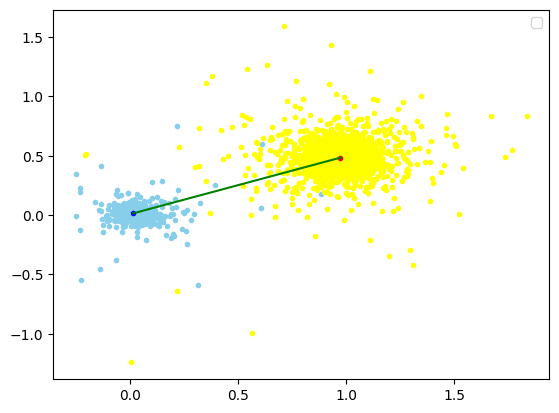

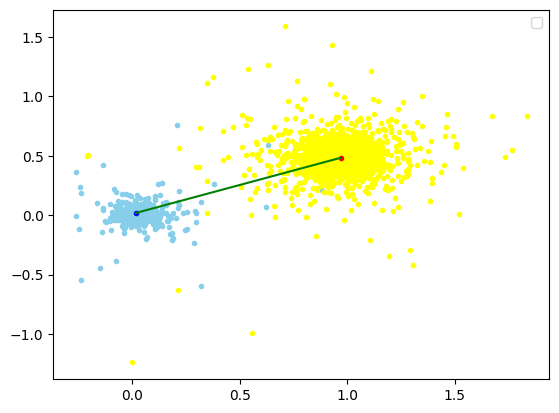

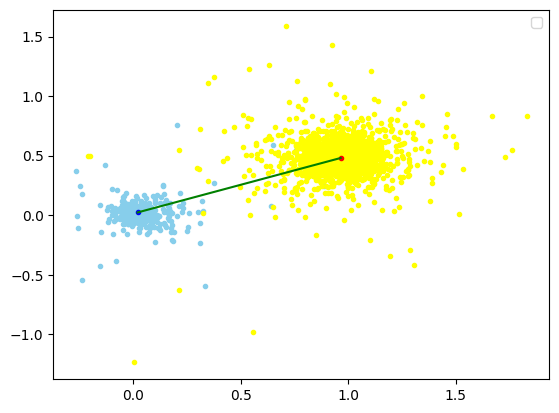

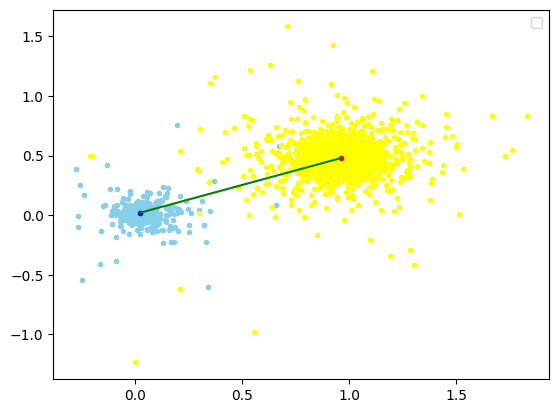

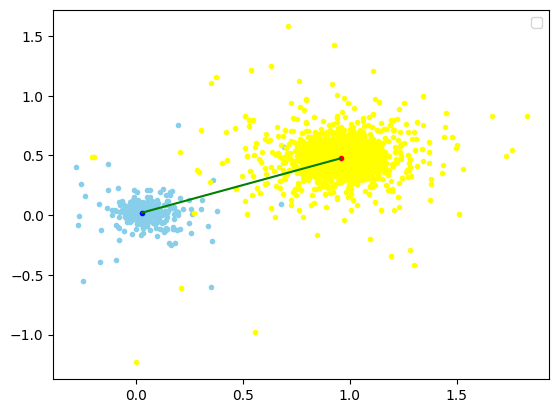

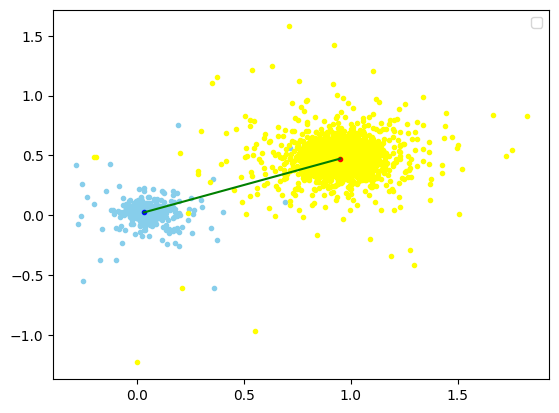

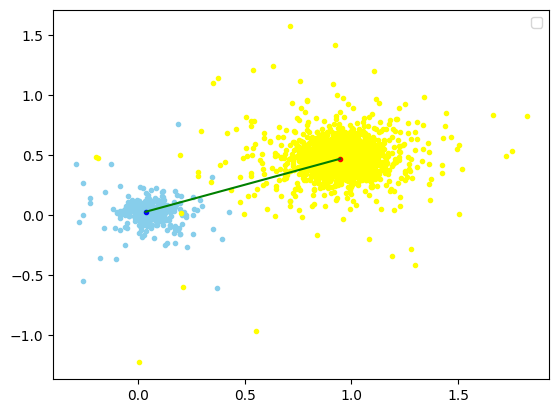

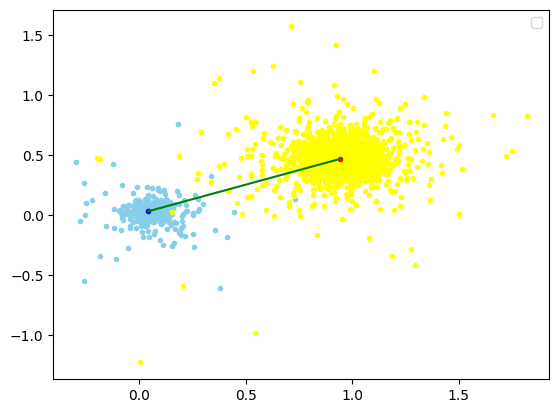

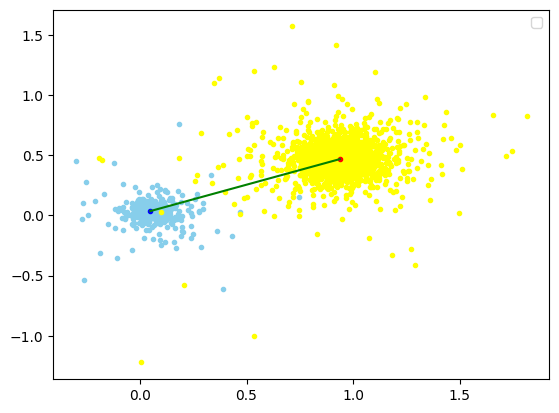

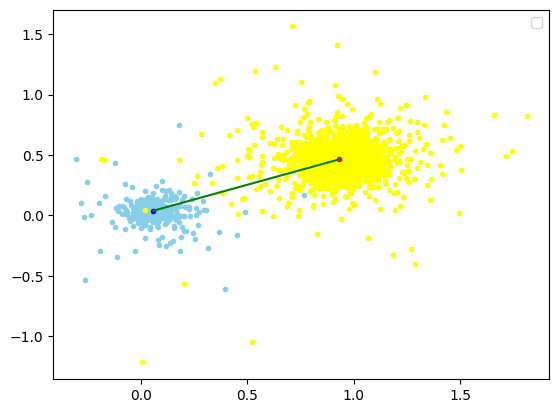

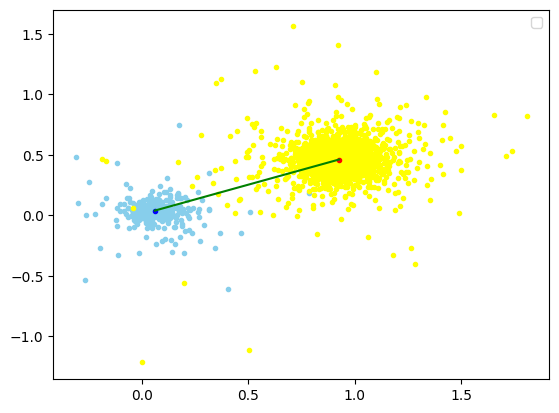

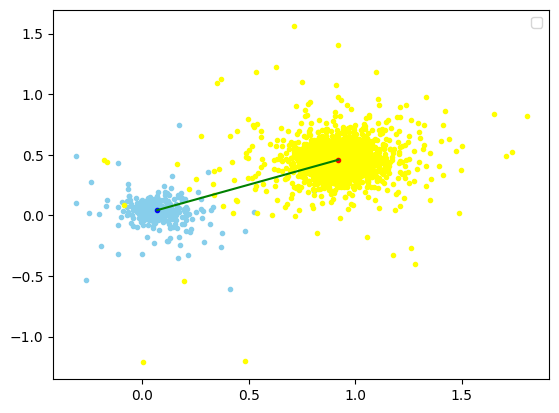

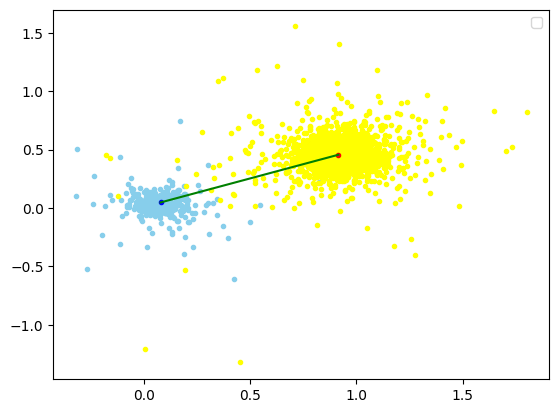

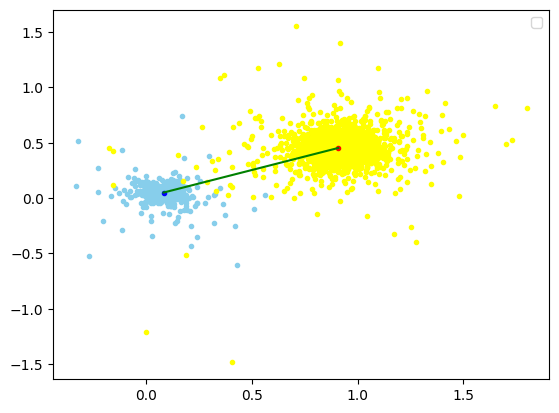

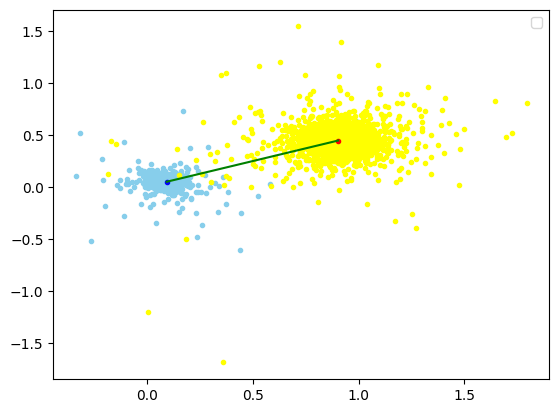

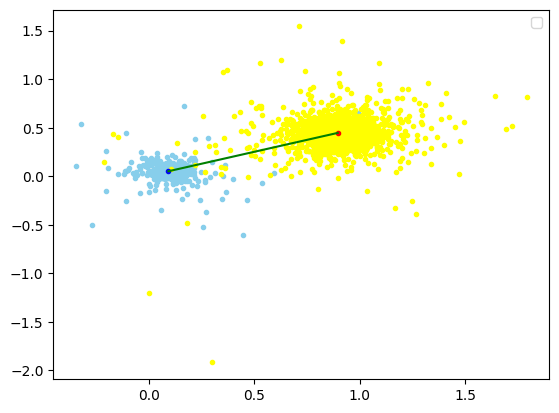

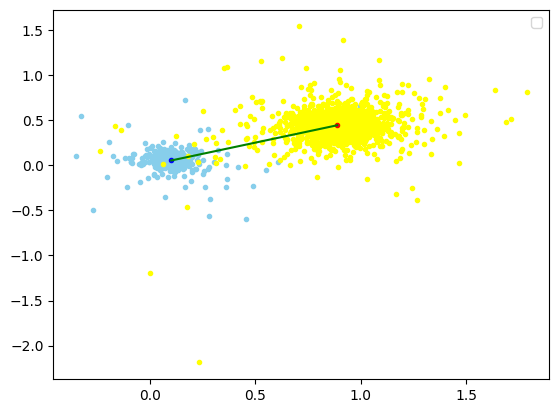

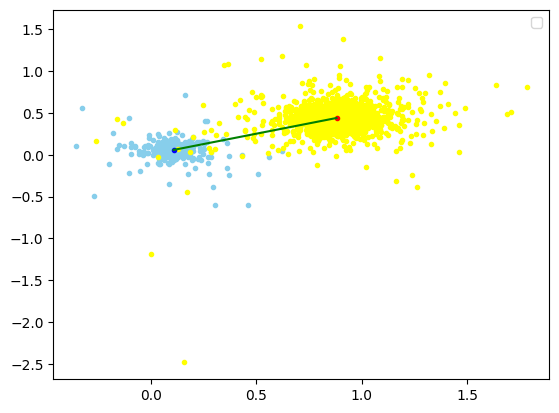

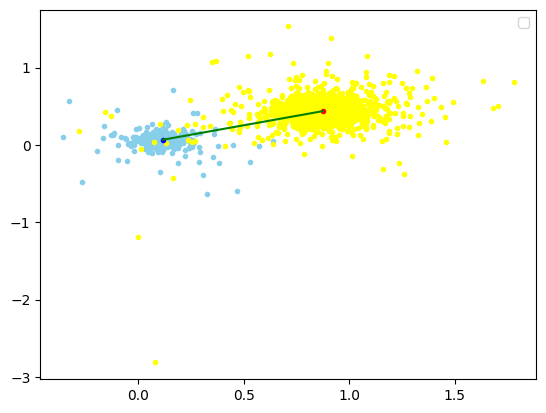

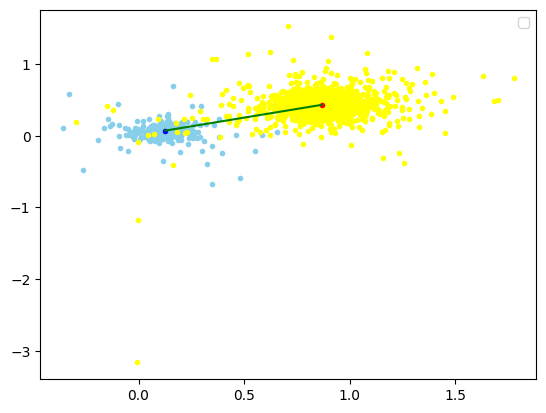

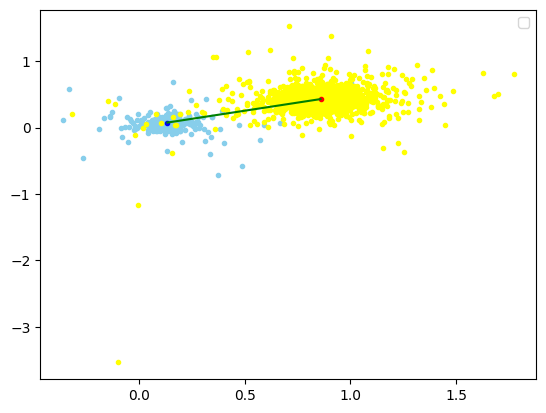

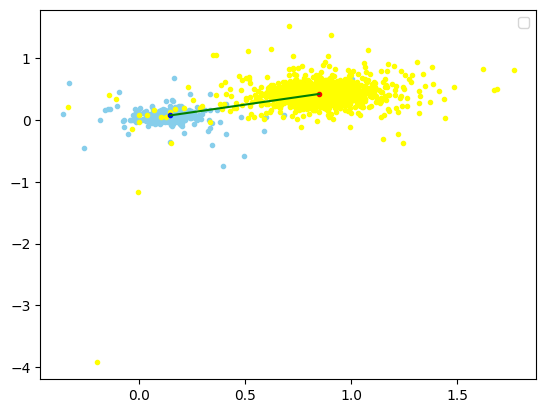

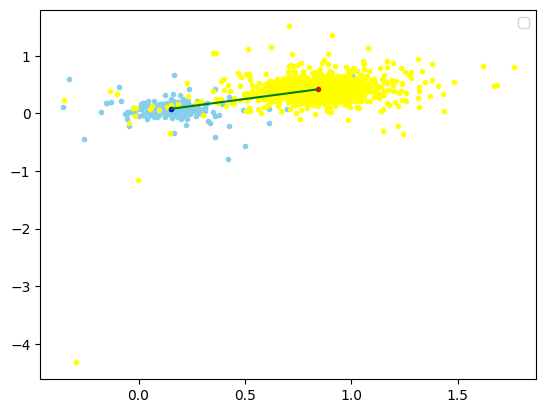

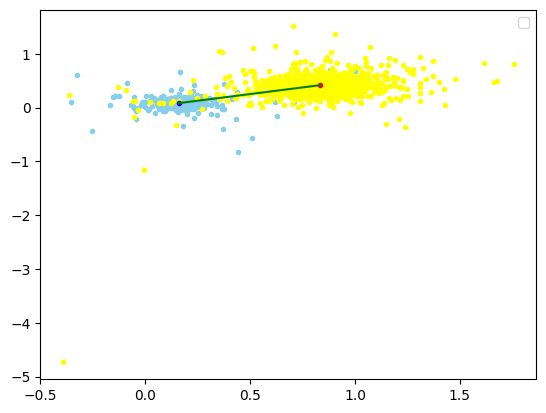

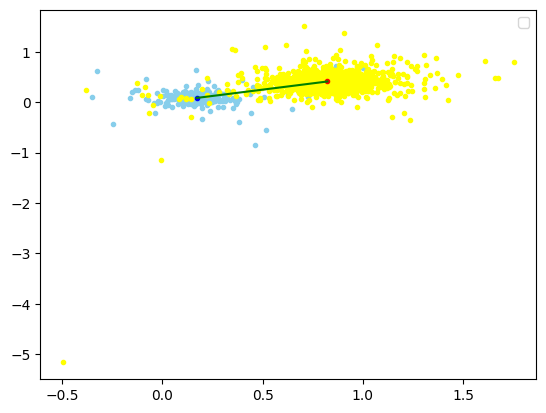

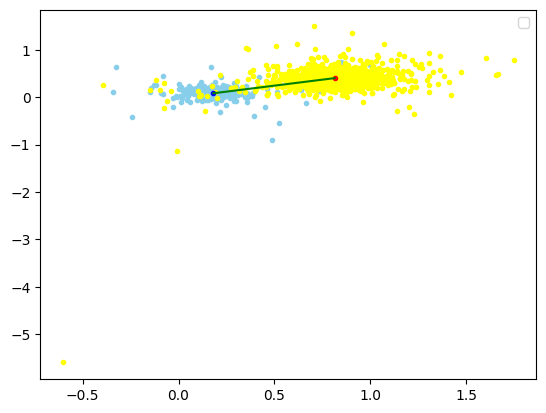

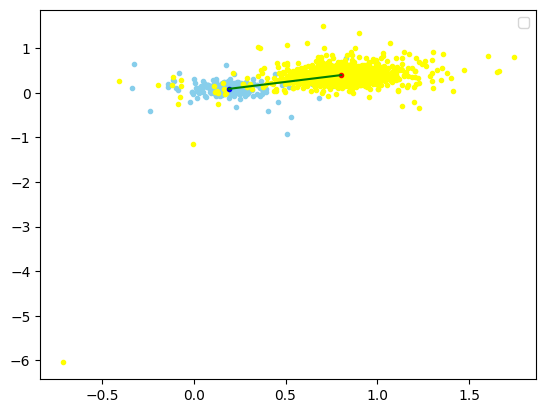

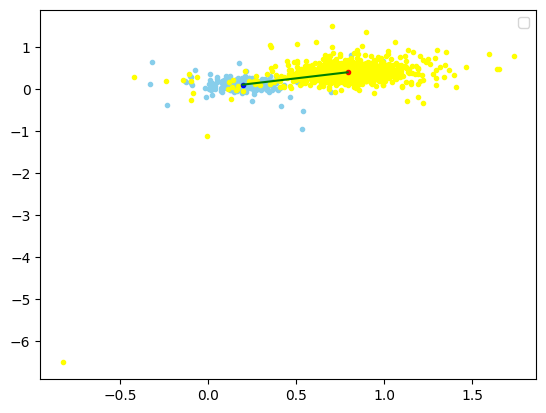

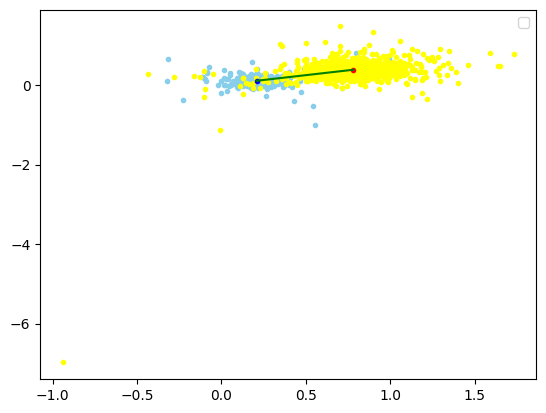

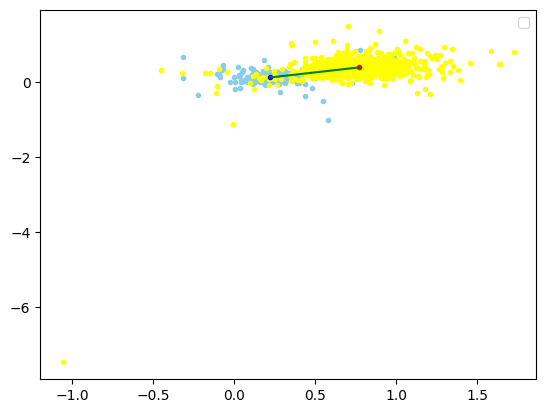

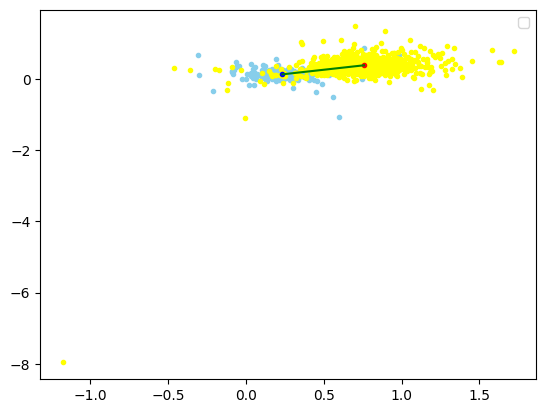

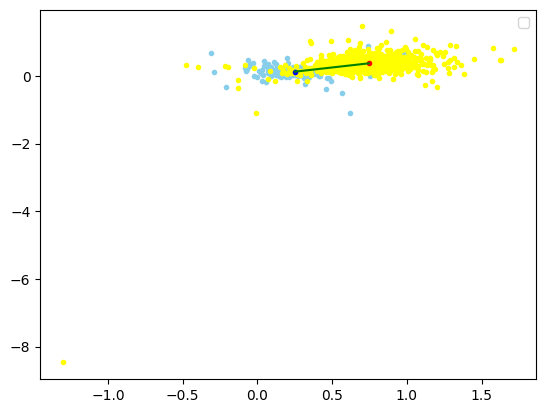

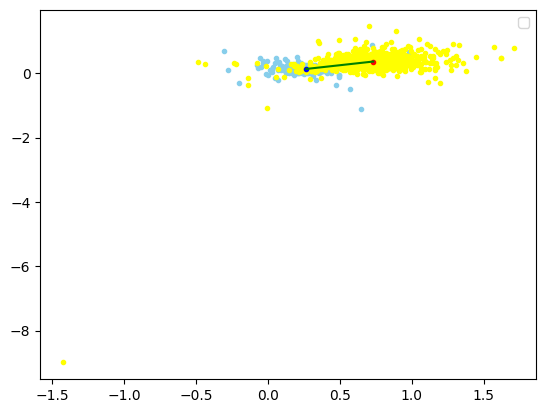

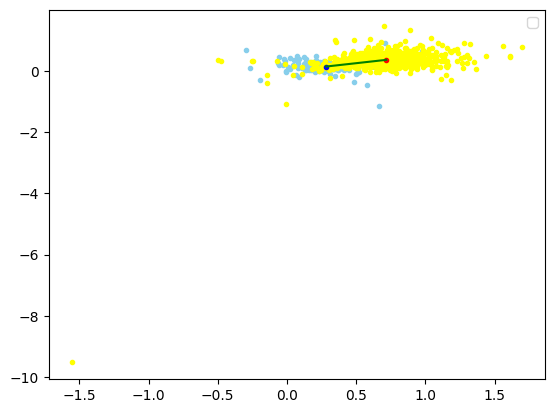

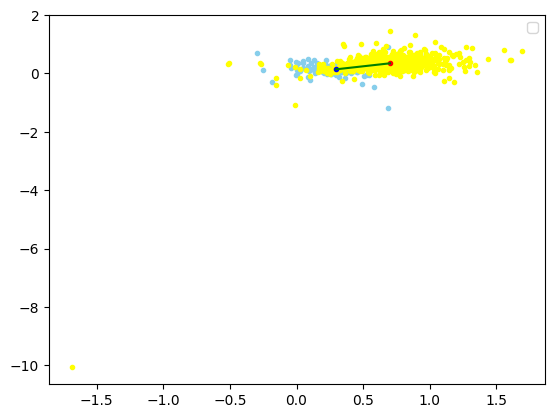

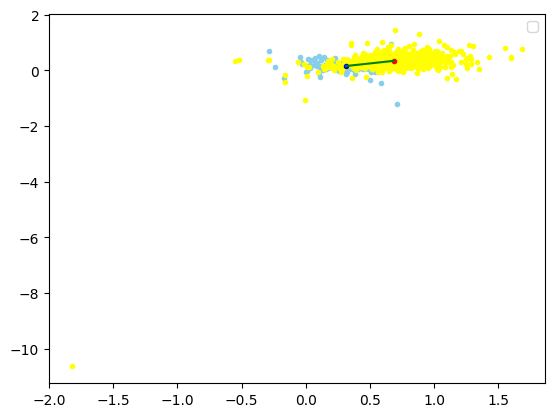

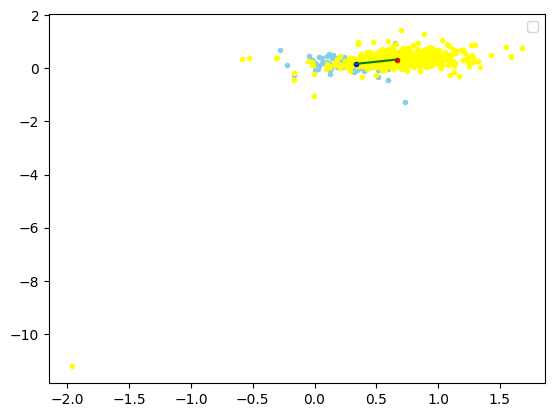

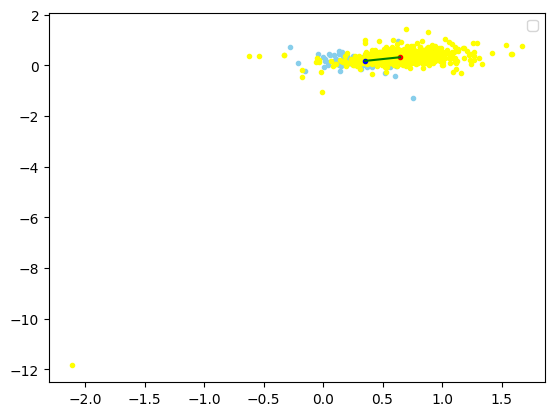

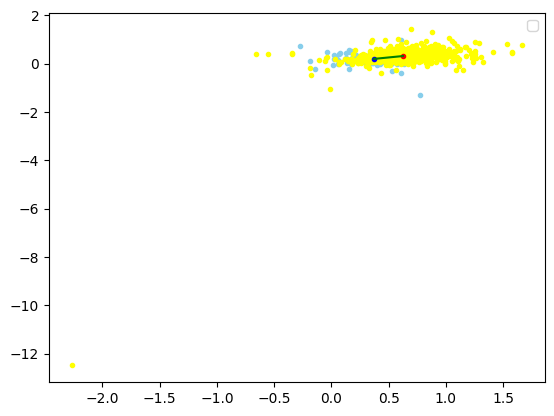

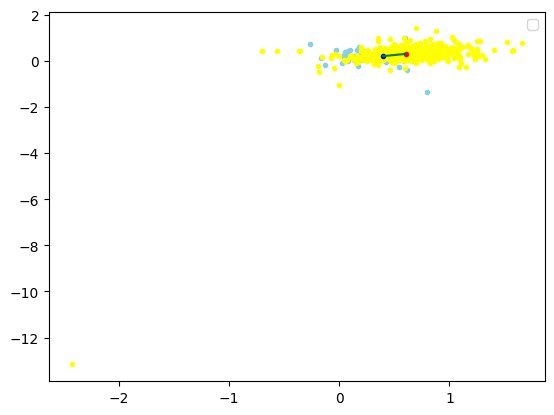

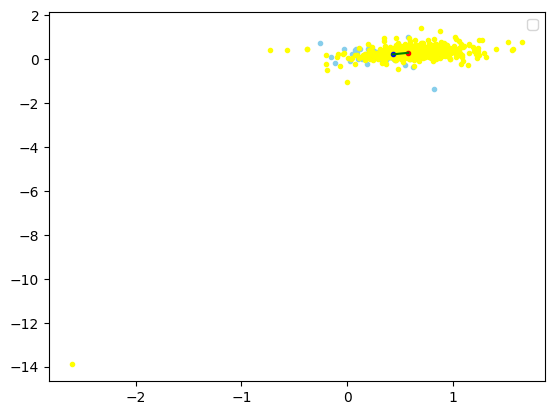

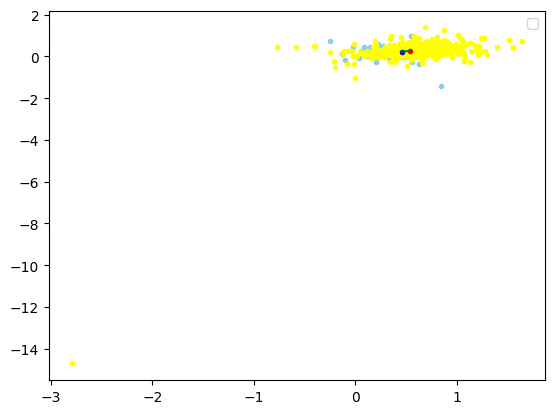

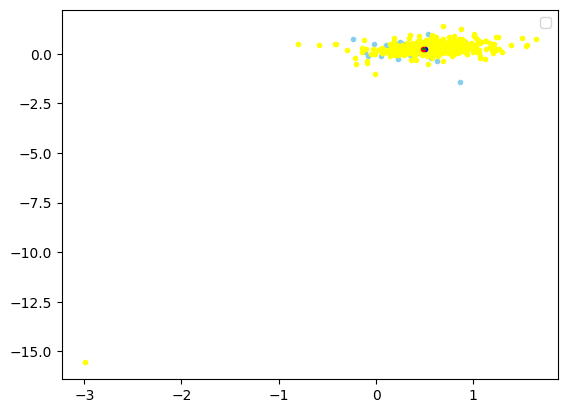

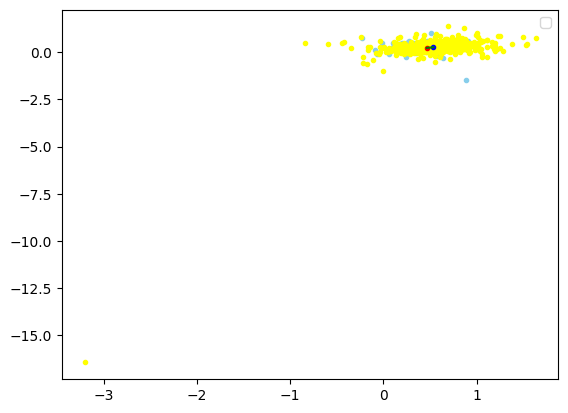

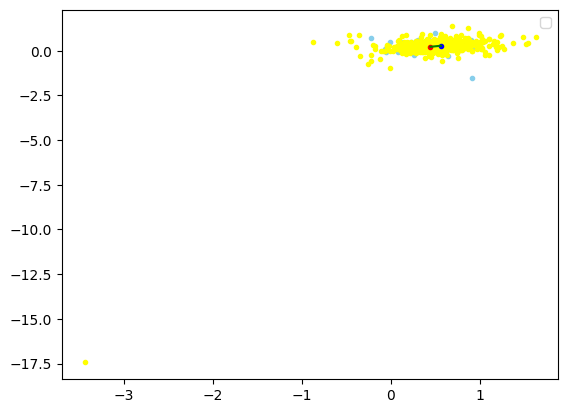

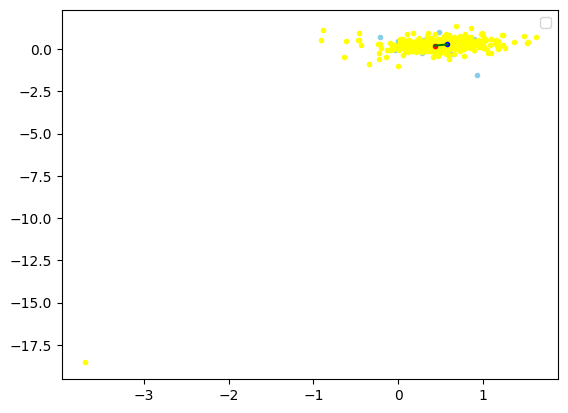

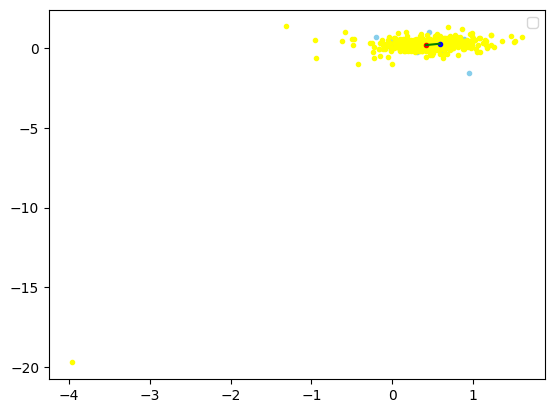

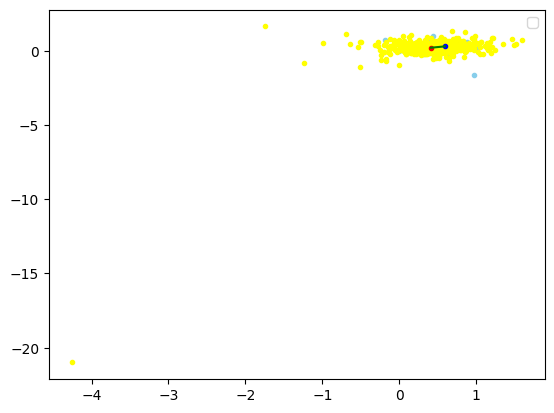

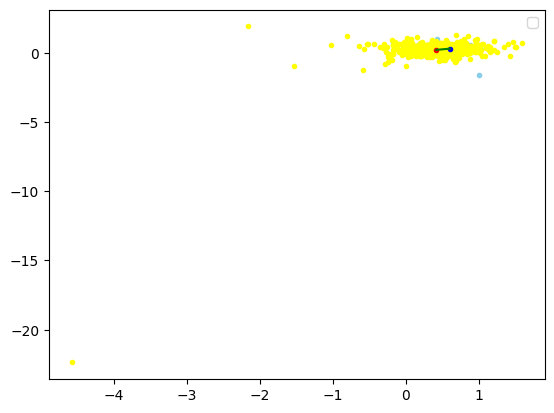

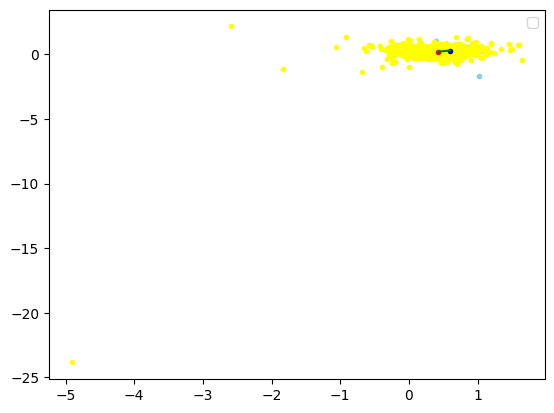

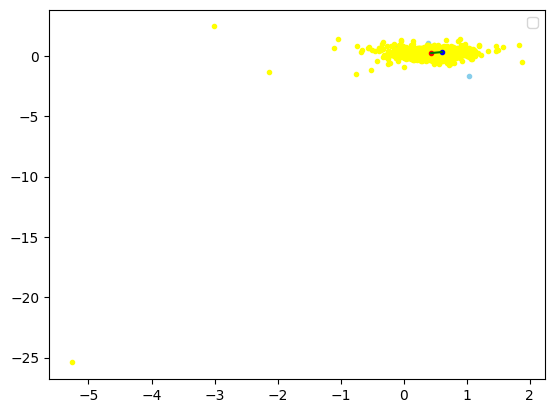

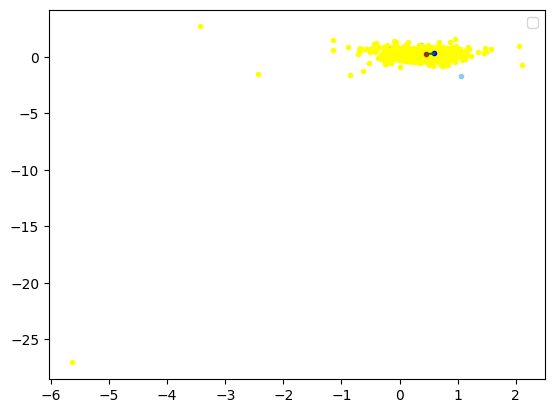

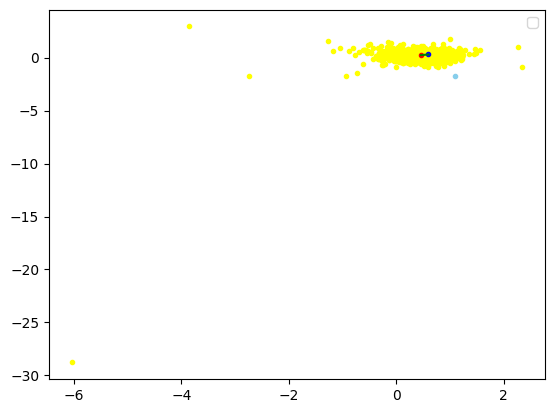

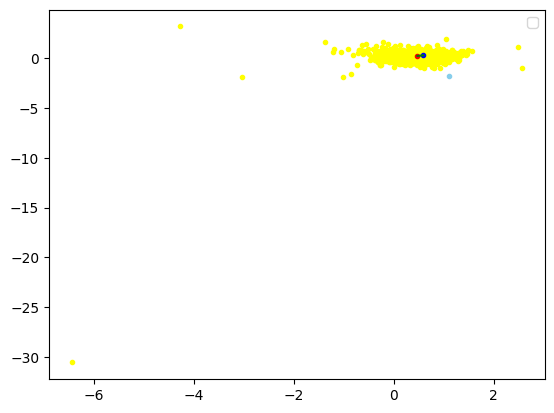

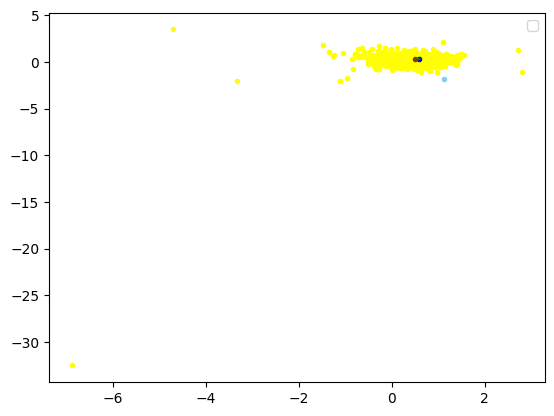

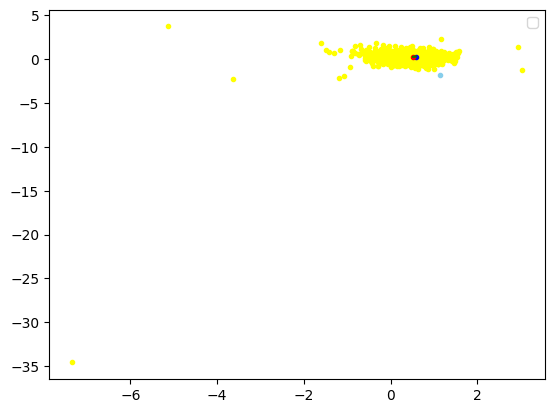

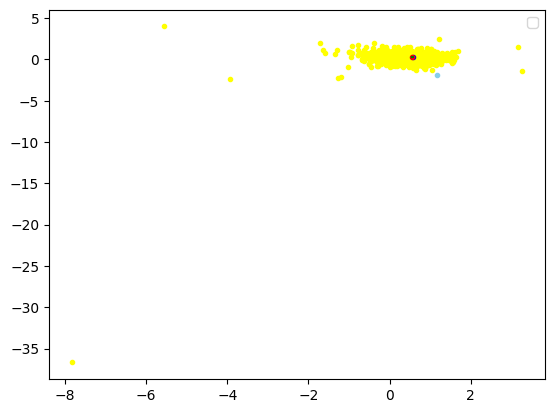

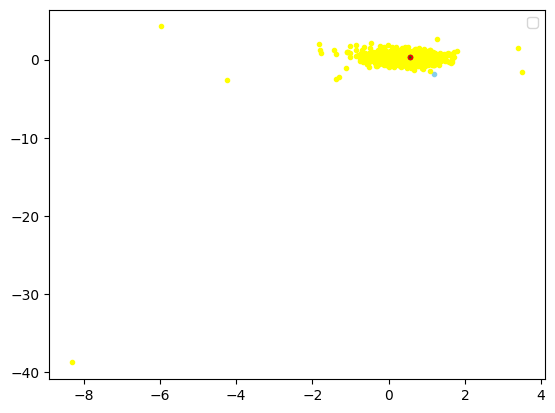

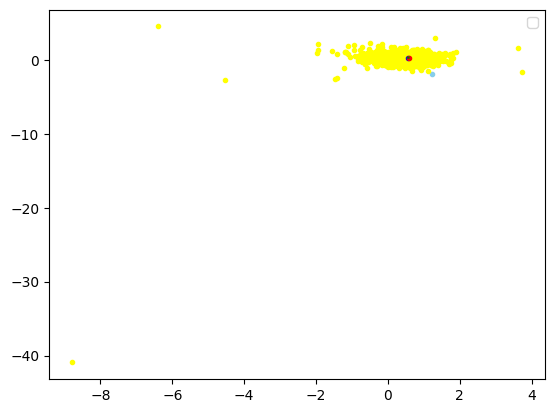

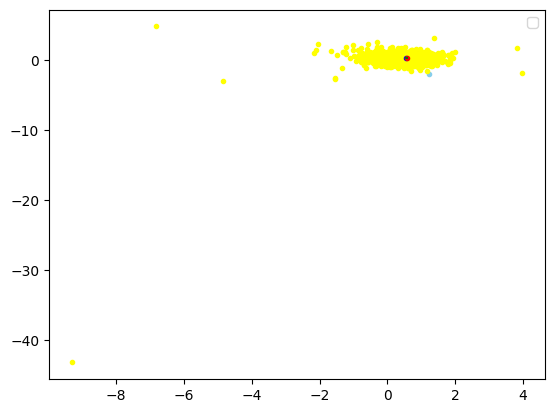

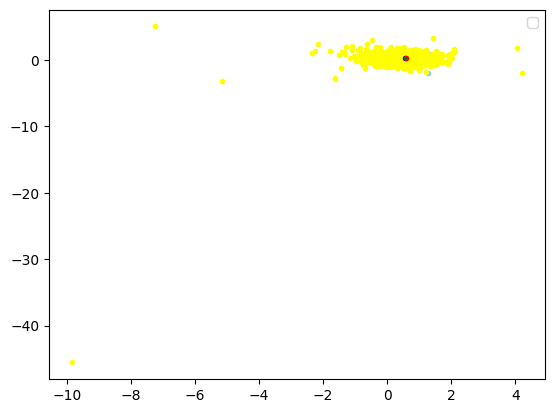

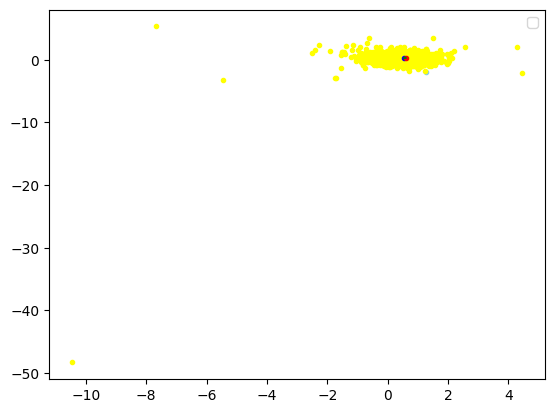

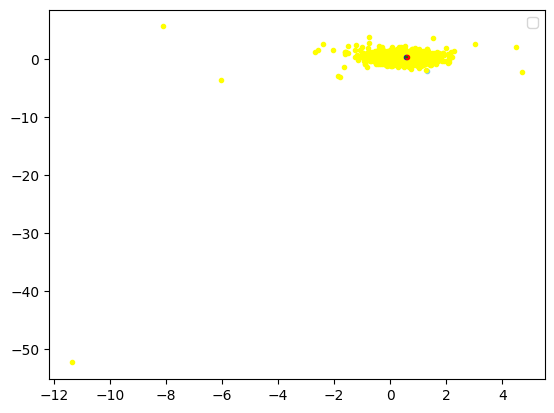

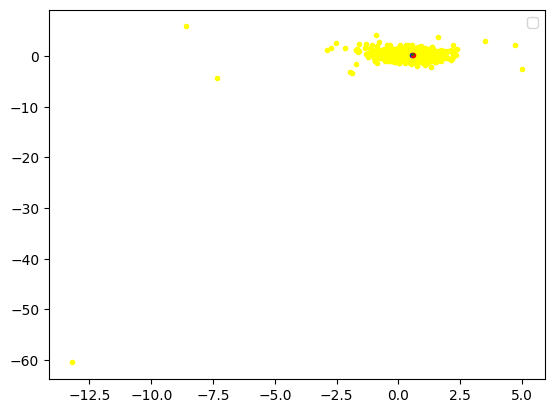

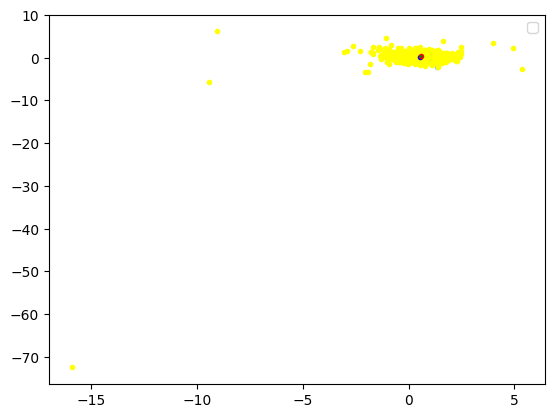

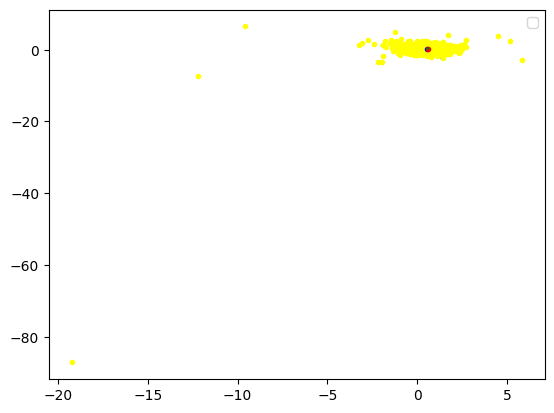

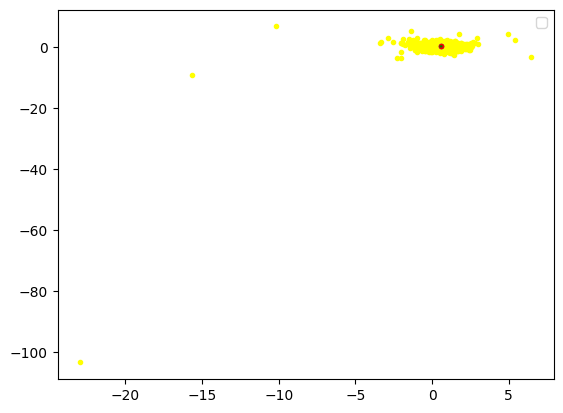

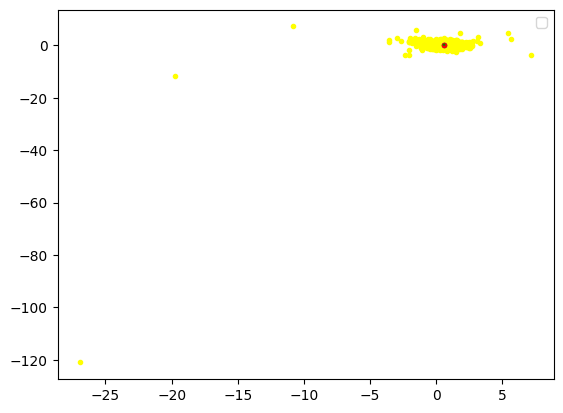

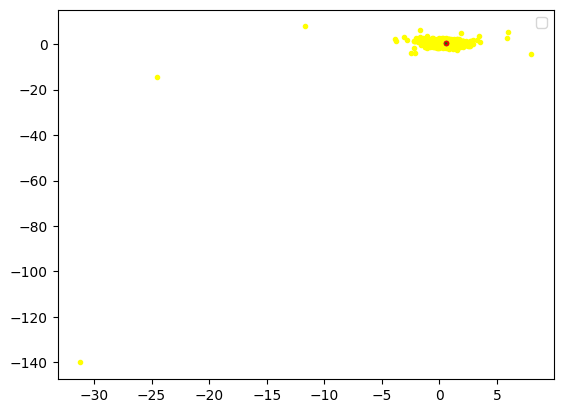

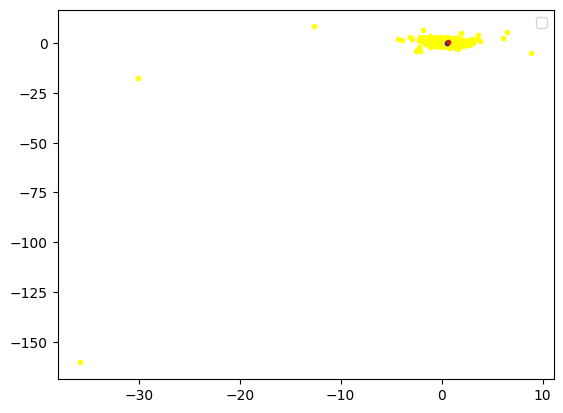

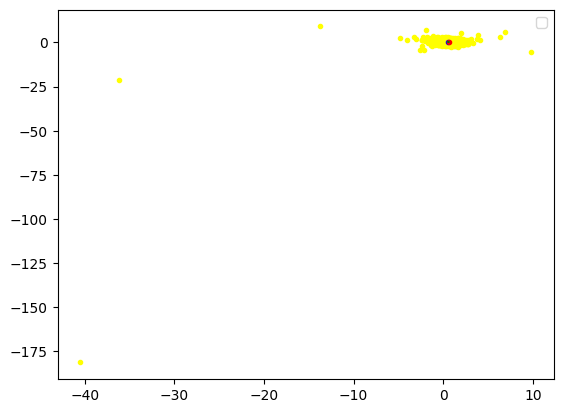

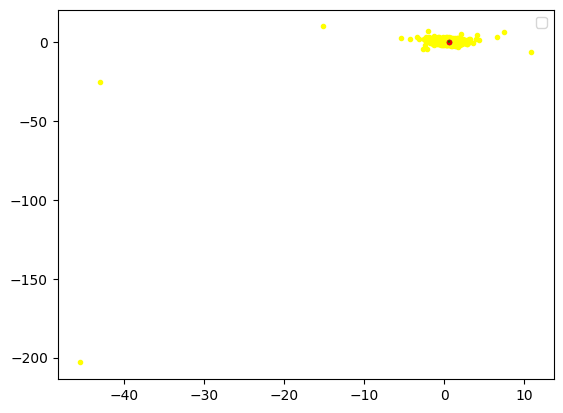

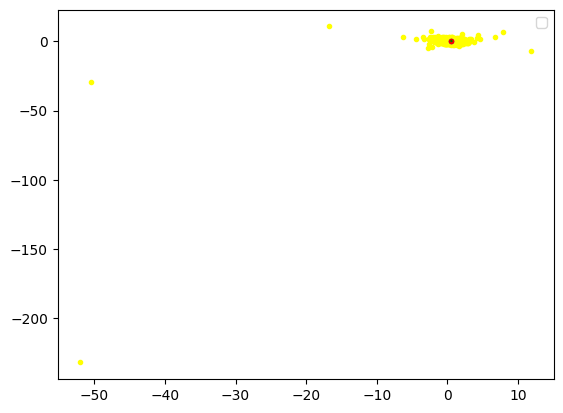

In [6]:
for i in range(0,len(star_data)):
  xs1= star_data[i].x.value_in(units.parsec)
  ys1= star_data[i].y.value_in(units.parsec)
  zs1= star_data[i].z.value_in(units.parsec)

  xg1= gas_data[i].x.value_in(units.parsec)
  yg1= gas_data[i].y.value_in(units.parsec)
  zg1= gas_data[i].z.value_in(units.parsec)

  plt.plot(xs1,ys1, '.', color='skyblue')
  plt.plot(xg1,yg1, '.', color='yellow')
  plt.plot(CMs[i][0],CMs[i][1], '.', color='blue')
  plt.plot(CMg[i][0],CMg[i][1], '.', color='red')
  plt.plot([CMs[i][0],CMg[i][0]],[CMs[i][1],CMg[i][1]], color='green')
  plt.legend()
  plt.show()

In [ ]:
CMs[0][1]

-0.0025352557673539514

Ahora veamos los potenciales

In [7]:
from amuse.datamodel import Particles, particles
from amuse.lab import read_set_from_file
Ep_gas_lista = []
Ep_stars_lista = []
all_list = []
for i in range(0,len(gas_data)):
  gas = gas_data[i]
  stars = star_data[i]
  all = particles.ParticlesSuperset([gas, stars])
  all_list.append(all)
  key_gas = all.get_intersecting_subset_in(gas).key
  mask_gas = all.get_indices_of_keys(key_gas)

  key_stars = all.get_intersecting_subset_in(stars).key
  mask_stars = all.get_indices_of_keys(key_stars)
  Ep = (all.potential()*all.mass/2)
  Ep_gas = Ep[mask_gas].sum().value_in(units.erg)
  Ep_stars = Ep[mask_stars].sum().value_in(units.erg)
  Ep_gas_lista.append(Ep_gas)
  Ep_stars_lista.append(Ep_stars)



In [ ]:
Ep_gas_lista[22]

-1.203075842183649e+51

In [8]:
Ec_gas_lista = []
Ec_stars_lista = []
for i in range(0,len(gas_data)):
  gas = gas_data[i]
  stars = star_data[i]
  k_g = (gas.kinetic_energy() + gas.thermal_energy()).value_in(units.erg)
  k_s = stars.kinetic_energy().value_in(units.erg)
  Ec_gas_lista.append(k_g)
  Ec_stars_lista.append(k_s)

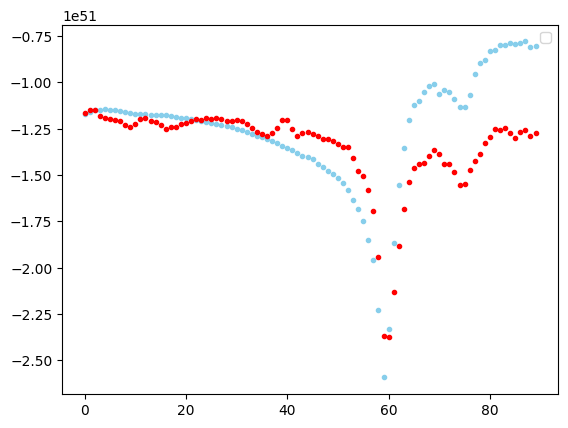

In [ ]:
plt.plot(range(90),Ep_gas_lista,".", color='skyblue')
plt.plot(range(90),Ep_stars_lista,".", color='red')
plt.legend()
plt.show()

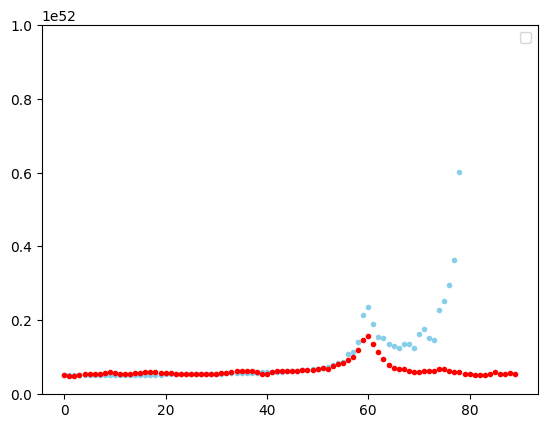

In [ ]:
plt.plot(range(90),Ec_gas_lista,".", color='skyblue')
plt.plot(range(90),Ec_stars_lista,".", color='red')
plt.ylim(0,1e52)
plt.legend()
plt.show()

Estudiamos la pérdida de masa

In [9]:
radioVirial = all.virial_radius().value_in(units.pc)
print(radioVirial)

0.2060815913


In [10]:
#Centro de masa de todo el sistema
CMs_all=[]
up = 0
down = 0
for i in range(0,len(all)):
  r6i = r6(all,i)
  up += (all[i].x.value_in(units.parsec), all[i].y.value_in(units.parsec), all[i].z.value_in(units.parsec))/r6i**3
  down += 1/r6i**3
  r = up/down
  CMs_all.append(r)

In [102]:
particlesIn = {}
for j in range(0,len(all_list)):
  radios_in=[]
  radioVirial = all_list[j].virial_radius().value_in(units.pc)
  for i in range(0,len(all_list[j])):
    r = (all_list[j][i].x.value_in(units.parsec), all_list[j][i].y.value_in(units.parsec), all_list[j][i].z.value_in(units.parsec))
    d_CM = np.sqrt((r[0]-CMs_all[j][0])**2+(r[1]-CMs_all[j][1])**2+(r[2]-CMs_all[j][2])**2)
    if d_CM <= 5*radioVirial:
      radios_in.append(all_list[j][i])
  particlesIn[f'Momento{j}'] = radios_in

In [11]:
particlesIn['Momento89'].kinetic_energy()#.value_in(units.erg)

AttributeError: 'list' object has no attribute 'kinetic_energy'

In [17]:
Masa_escapada = {}
j = 45
particulas = all_list[j]
#Primera condición.
x_particulas = particulas.x.value_in(units.parsec) - CMs_all[j][0]
y_particulas = particulas.y.value_in(units.parsec) - CMs_all[j][1]
z_particulas = particulas.z.value_in(units.pc)- CMs_all[j][2]
r = np.sqrt(x_particulas**2 + y_particulas**2 + z_particulas**2)

mascara = r >= 5*radioVirial

  #Segunda Condición.

E_k = particulas.specific_kinetic_energy()
E_p = particulas.potential()

mascara2 = E_k + E_p >= 0 | units.pc**2/units.s**2


  #Ahora unimos las condiciones para filtrar las partículas desligadas.
mascara_final = mascara*mascara2

particulas_desligadas = particulas[mascara_final]
  #Las guardamos en un diccionario dependiendo del momento al que se encuentre.
Masa_escapada[f'momento{j}'] = particulas_desligadas.total_mass()
print(Masa_escapada)

{'momento45': quantity<2.187812e+32 kg>}


In [18]:
#Lo expandimos a todo el sistema:
Masa_escapada = {}
j = 45
for j in range(0,len(all_list)):
  particulas = all_list[j]
  #Primera condición.
  x_particulas = particulas.x.value_in(units.parsec) - CMs_all[j][0]
  y_particulas = particulas.y.value_in(units.parsec) - CMs_all[j][1]
  z_particulas = particulas.z.value_in(units.pc)- CMs_all[j][2]
  r = np.sqrt(x_particulas**2 + y_particulas**2 + z_particulas**2)

  mascara = r >= 5*radioVirial

  #Segunda Condición.

  E_k = particulas.specific_kinetic_energy()
  E_p = particulas.potential()

  mascara2 = E_k + E_p >= 0 | units.pc**2/units.s**2


  #Ahora unimos las condiciones para filtrar las partículas desligadas.
  mascara_final = mascara*mascara2

  if mascara2.sum() == 0:
    Masa_escapada[f'momento{j}'] = 0

  else:
    particulas_desligadas = particulas[mascara_final]
    #Las guardamos en un diccionario dependiendo del momento al que se encuentre.
    Masa_escapada[f'momento{j}'] = particulas_desligadas.total_mass()
    print(Masa_escapada)

Masa_escapada

AttributeError: 'list' object has no attribute 'sum'

In [61]:
print(f"Total de partículas: {len(particulas)}")
print(f"Partículas seleccionadas: {mascara2.sum()}")
print(f"Máscara completa: {mascara_final}")


Total de partículas: 5500
Partículas seleccionadas: 0
Máscara completa: [False False False ..., False False False]


In [55]:
print(units.parsec == units.pc)

True


In [26]:
len(radios_in)

133697

In [24]:
len(all_list[0])
len(star_data[0]) + len(gas_data[0])

5500

In [20]:
all_list[0][0].x

quantity<3.19907340614e+16 m>

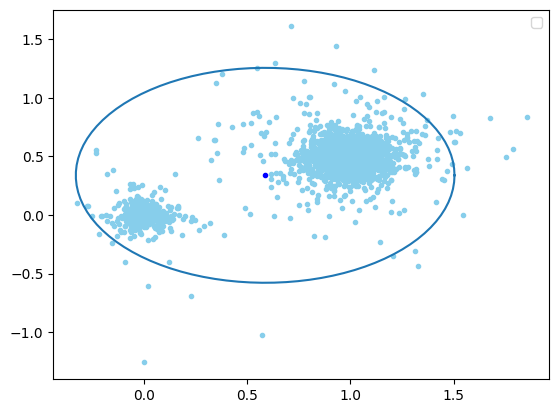

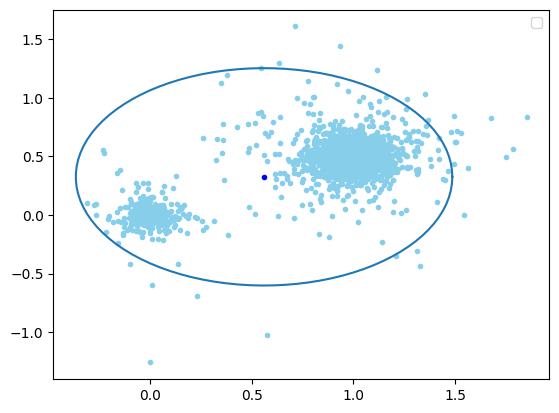

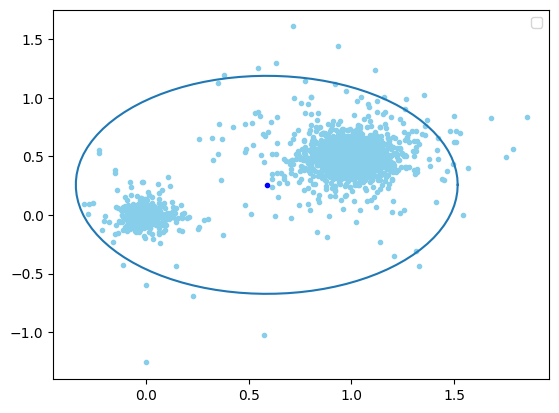

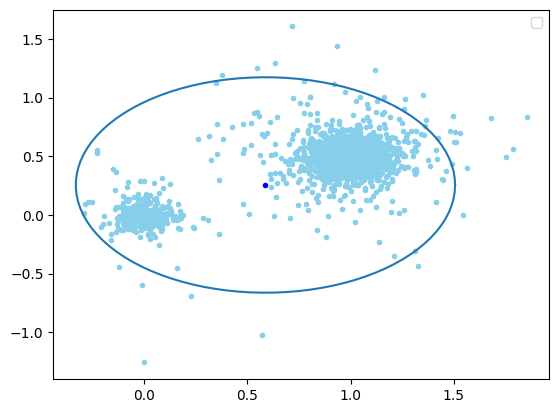

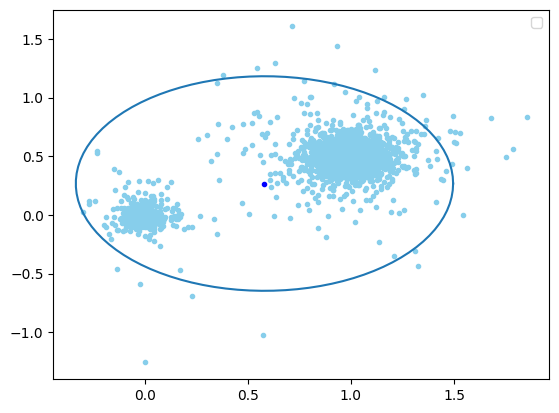

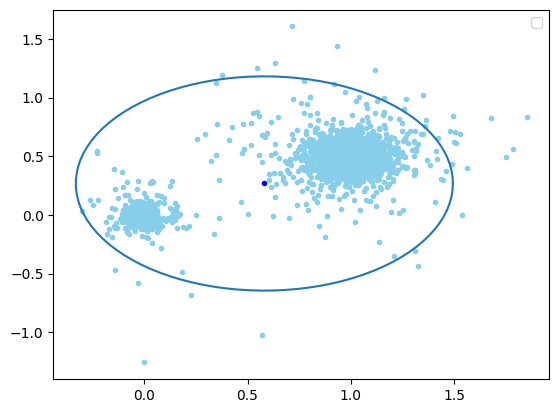

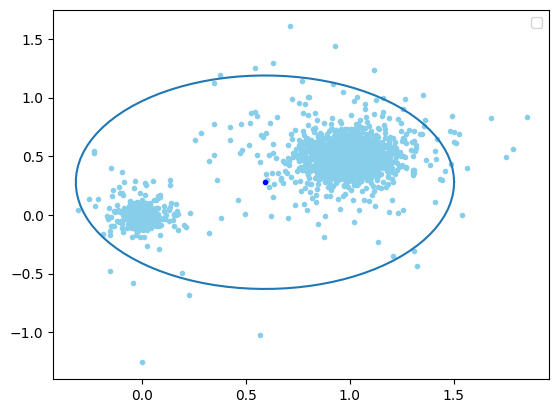

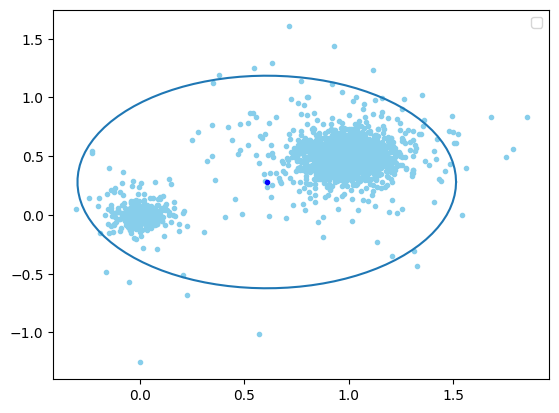

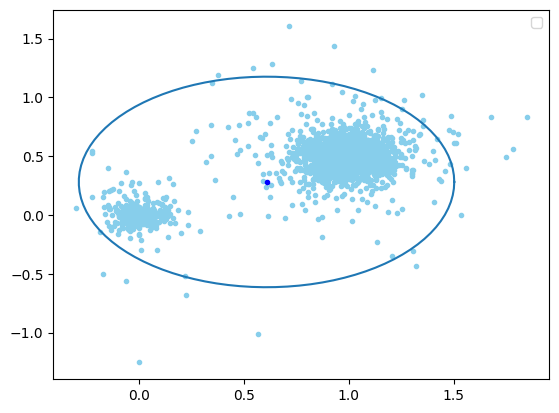

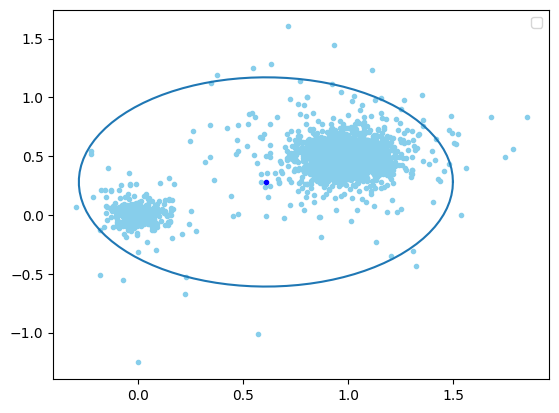

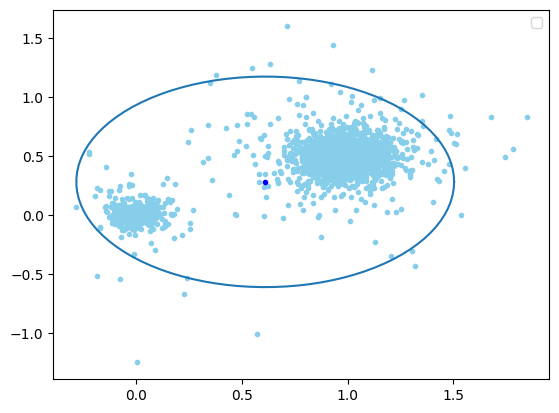

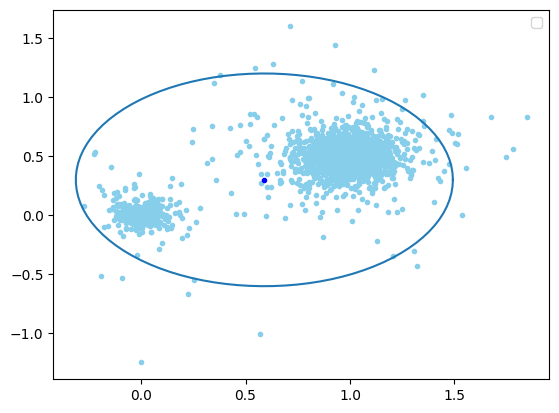

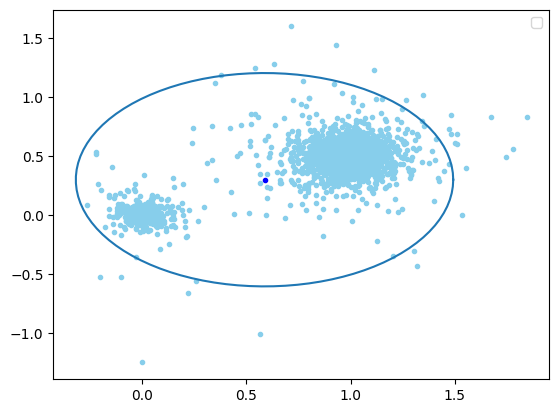

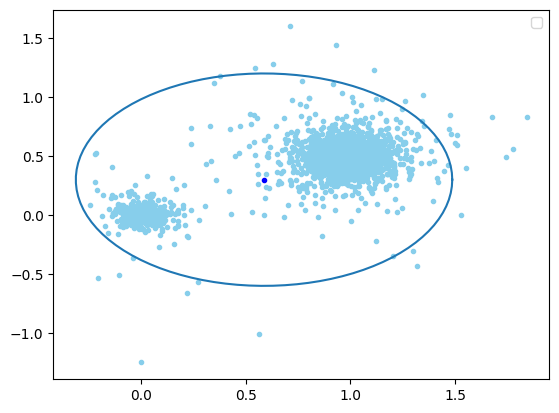

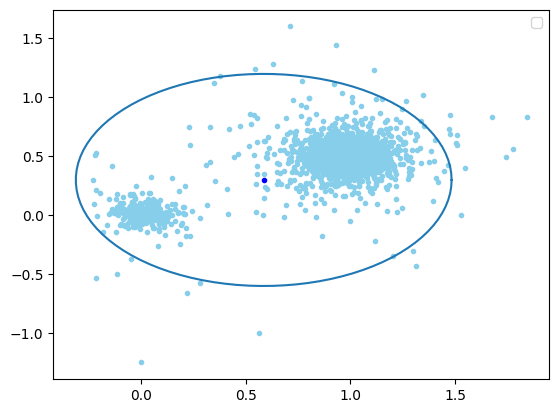

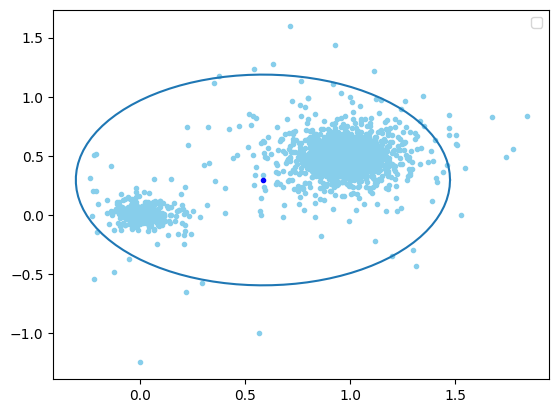

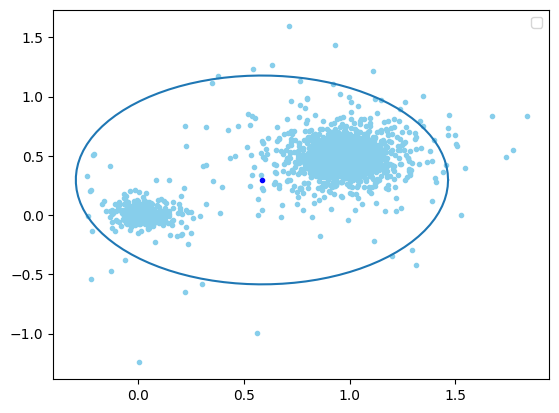

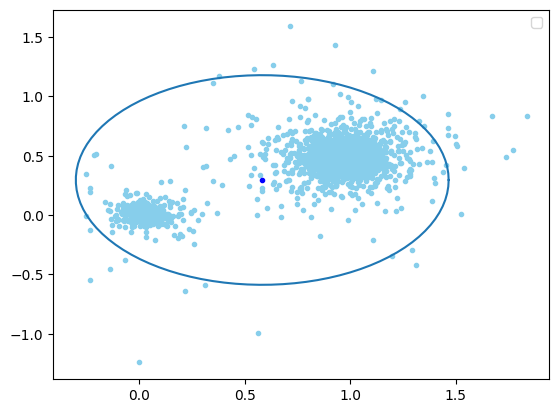

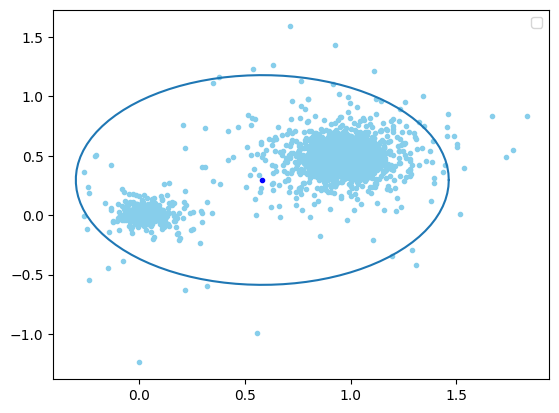

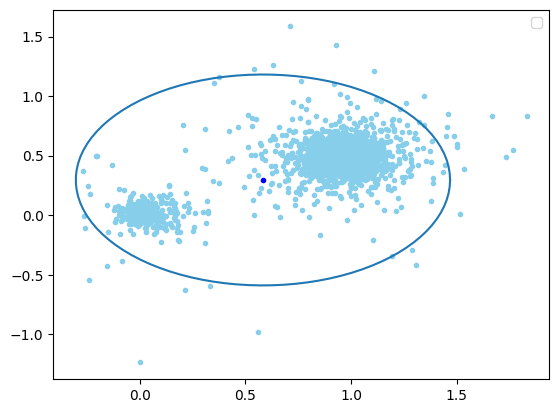

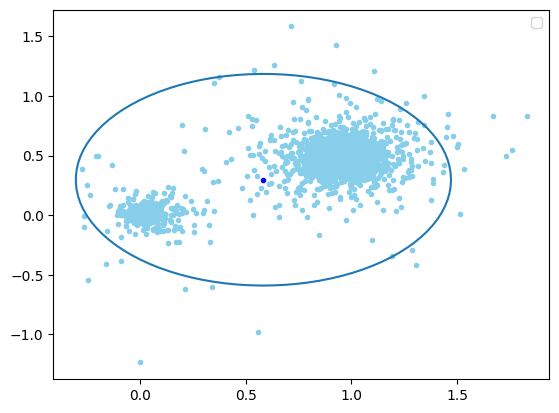

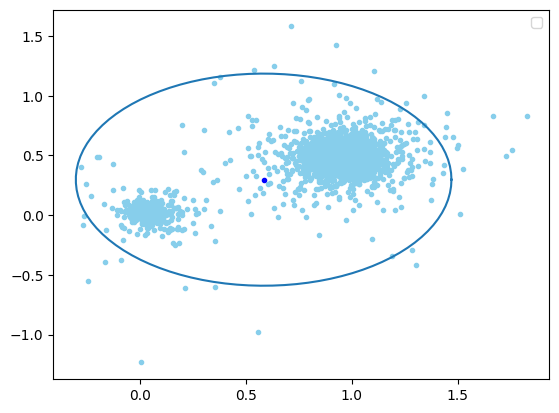

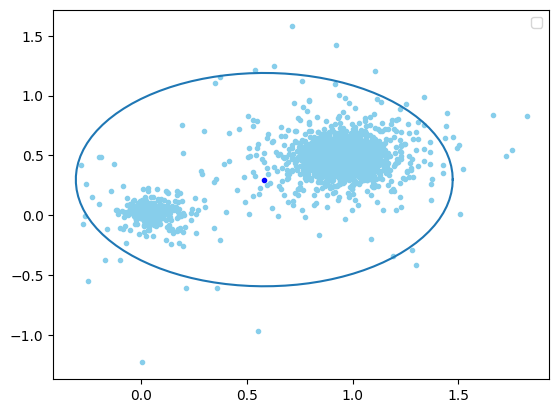

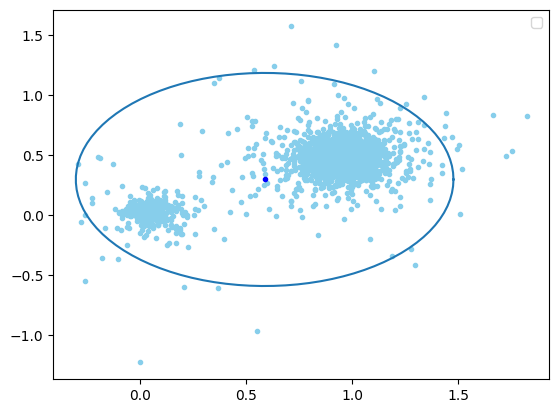

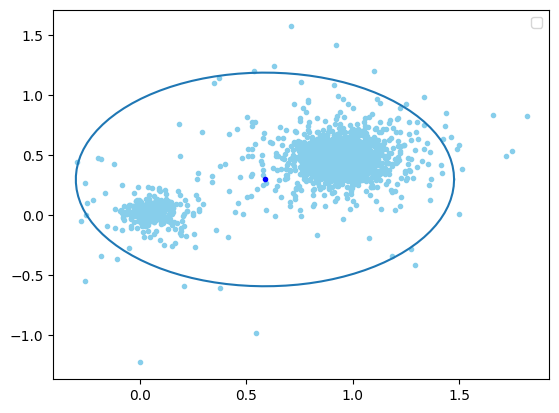

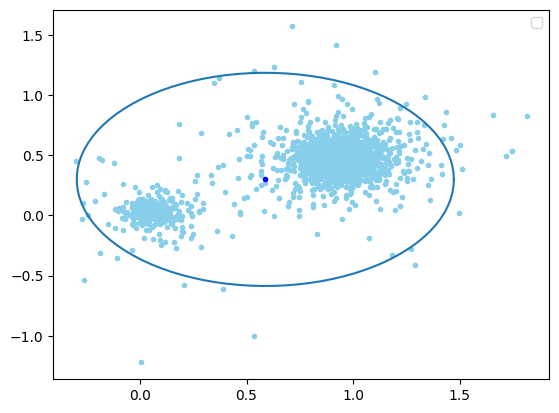

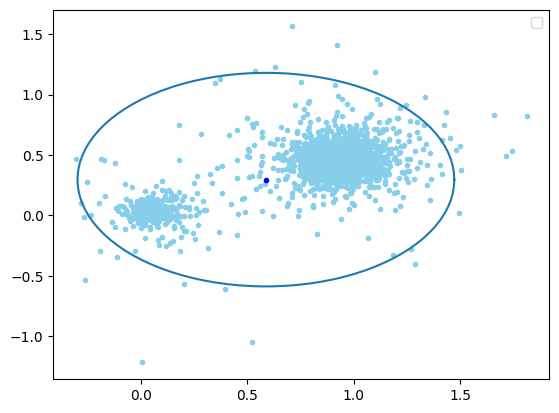

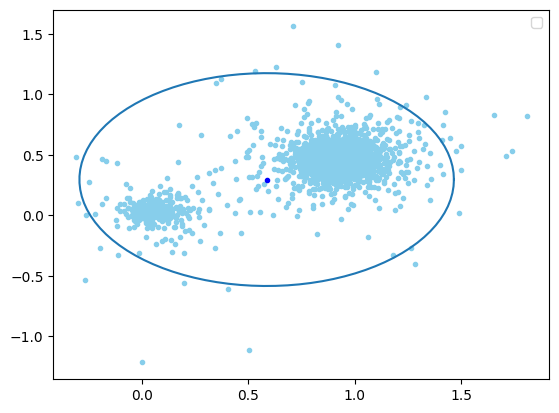

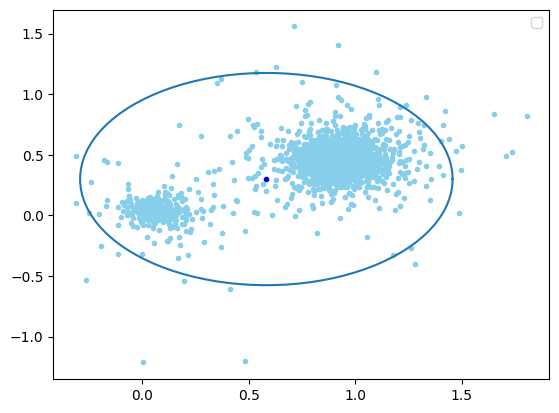

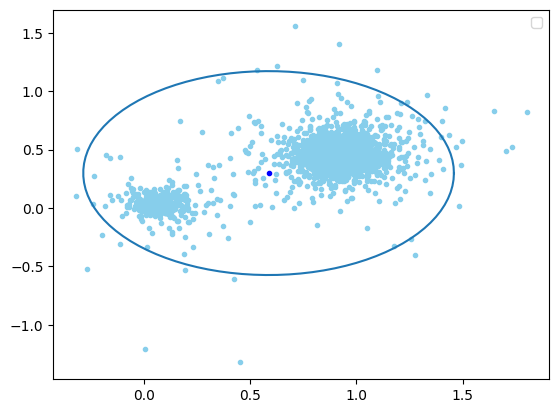

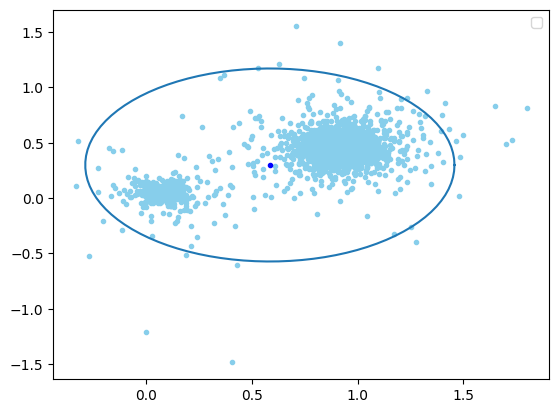

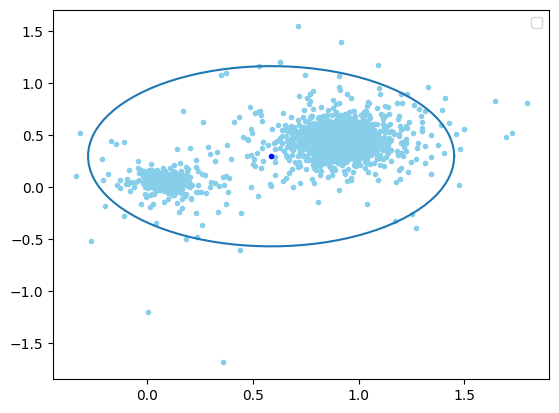

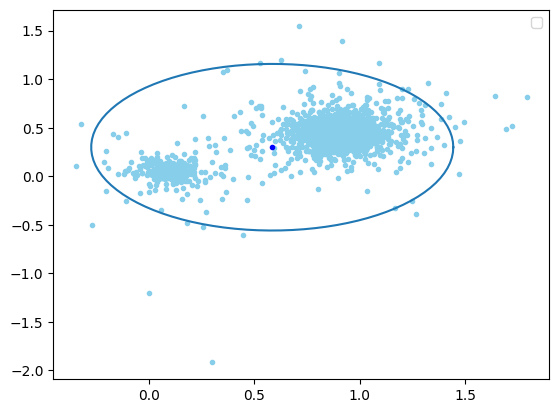

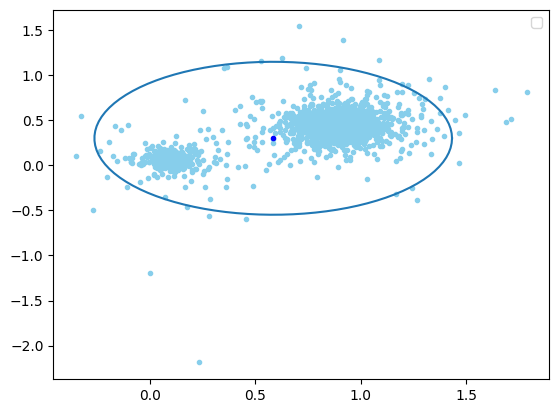

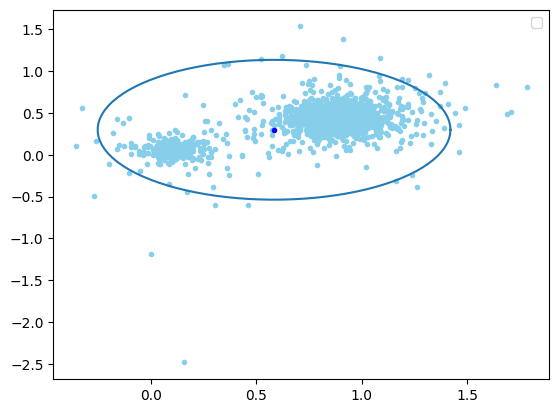

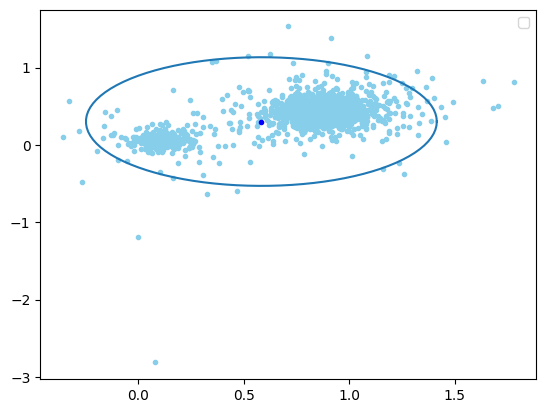

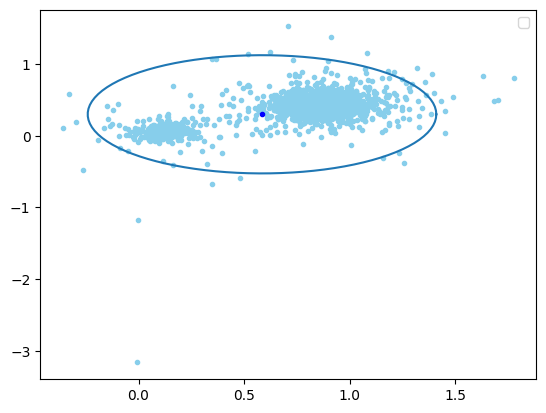

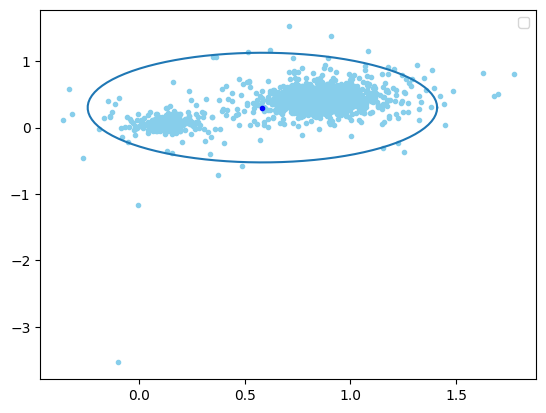

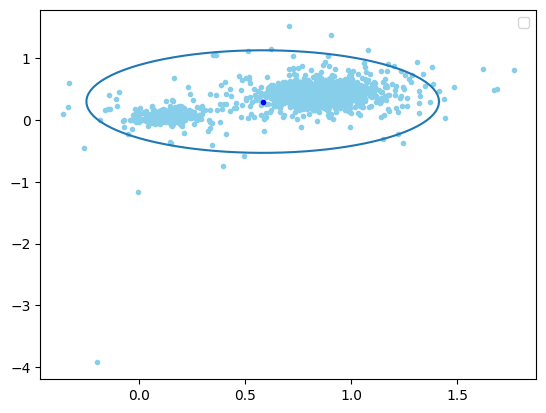

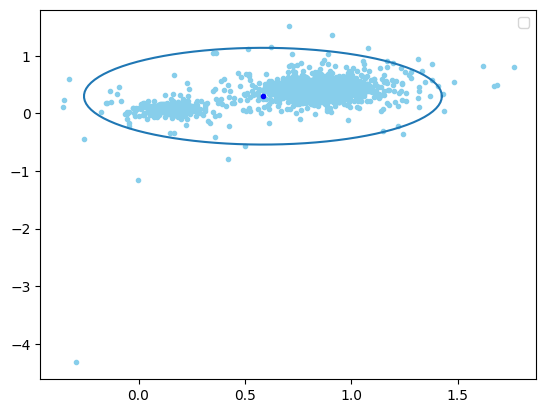

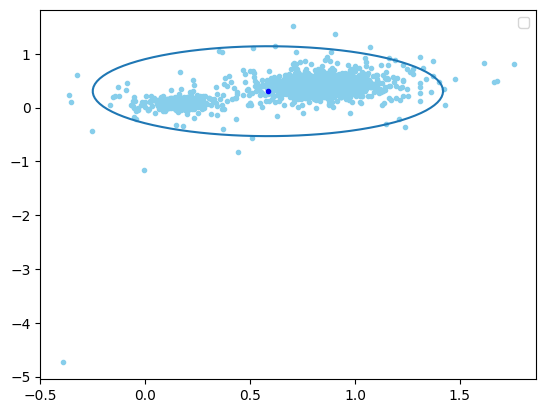

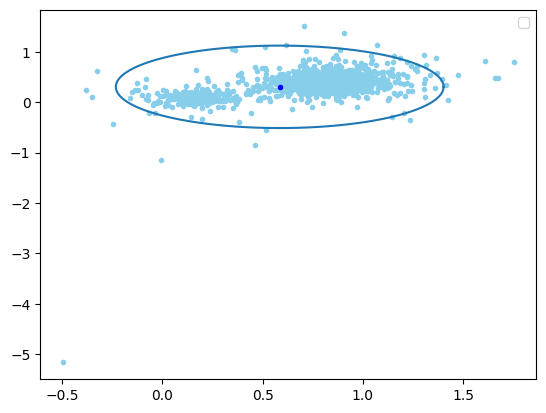

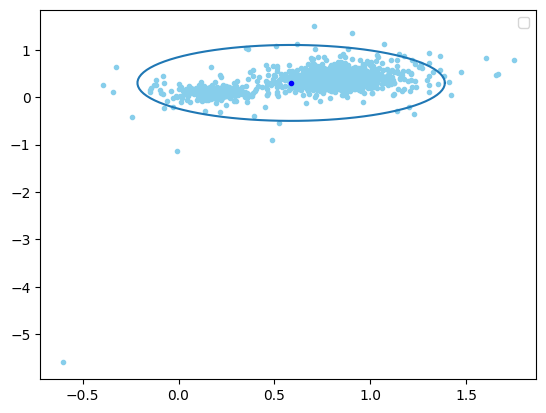

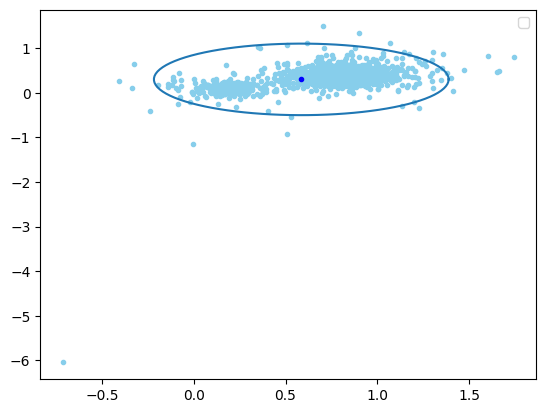

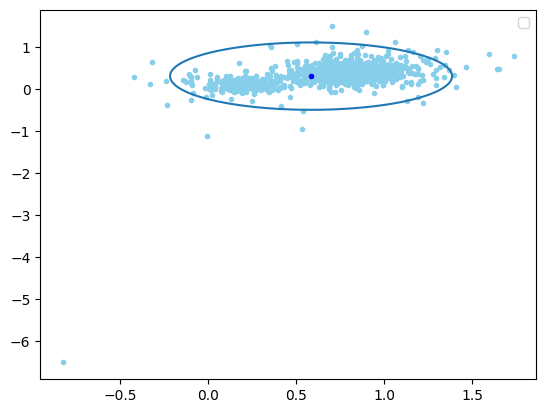

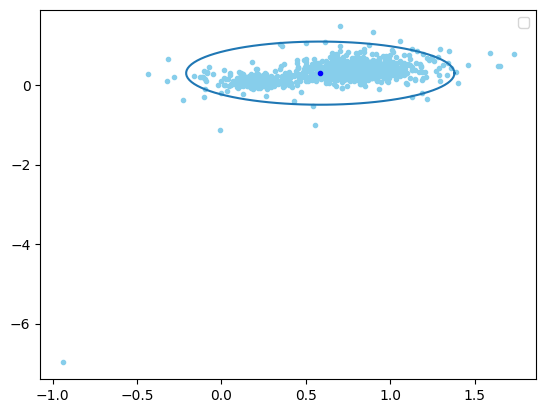

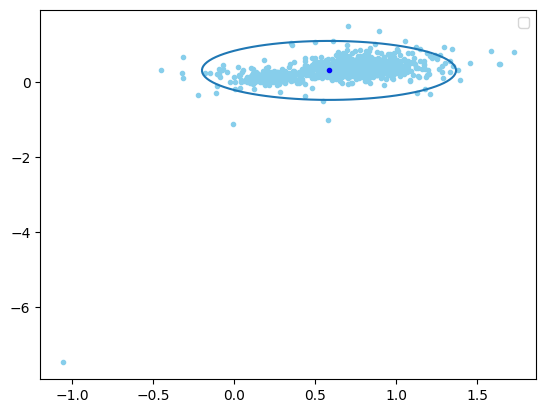

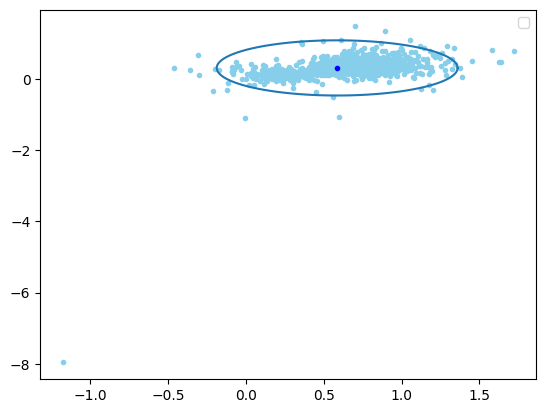

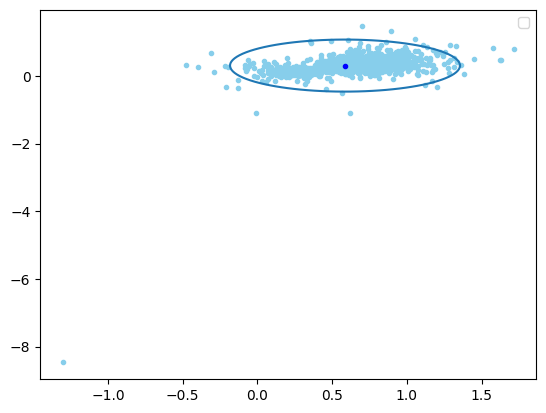

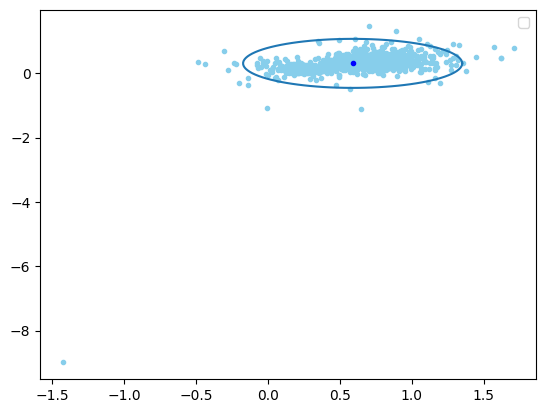

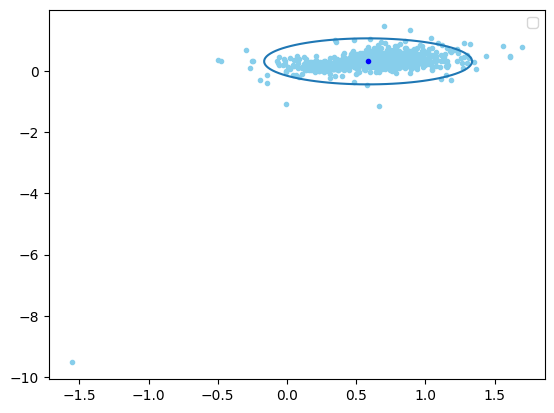

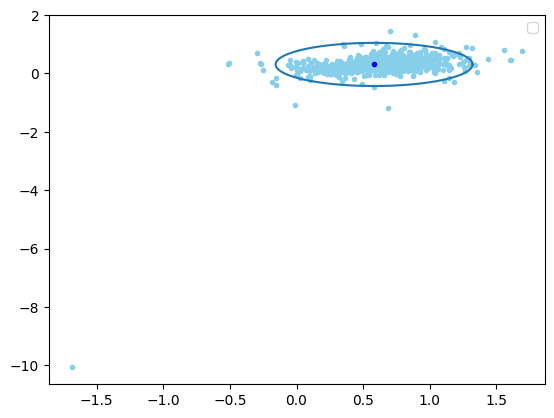

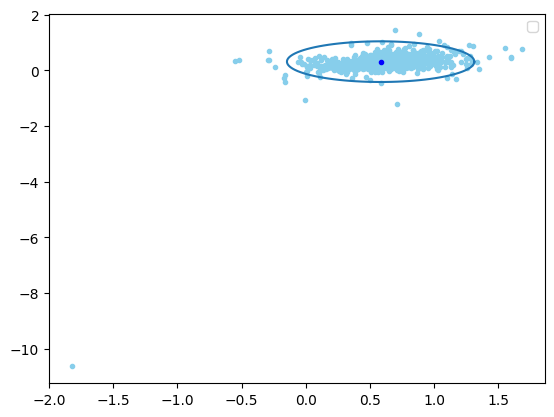

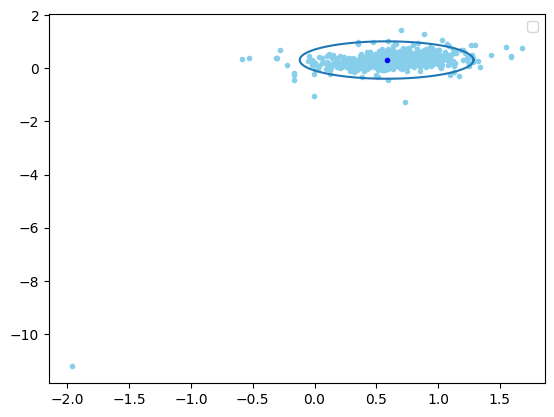

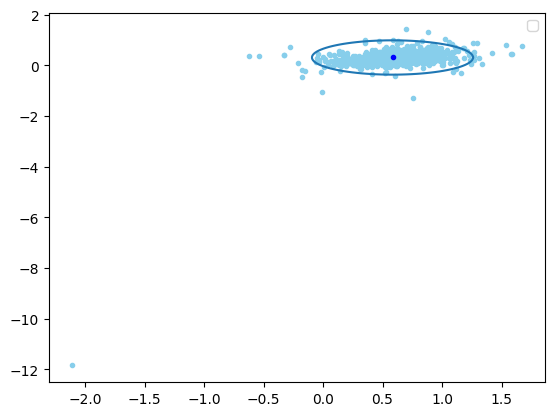

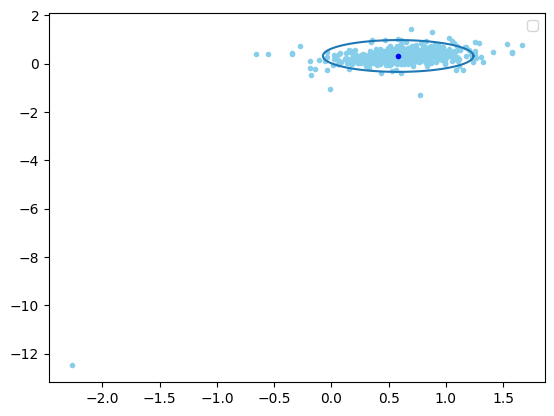

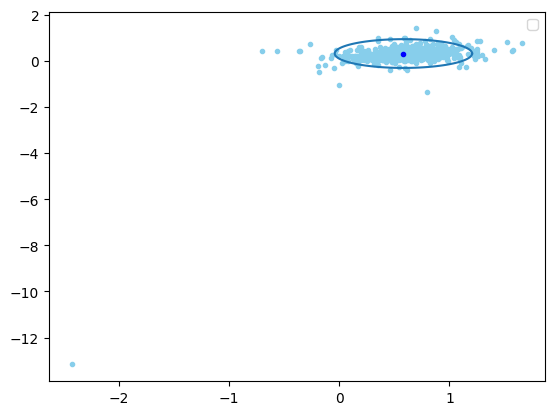

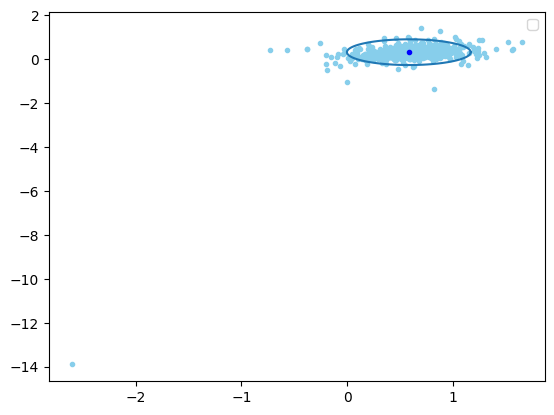

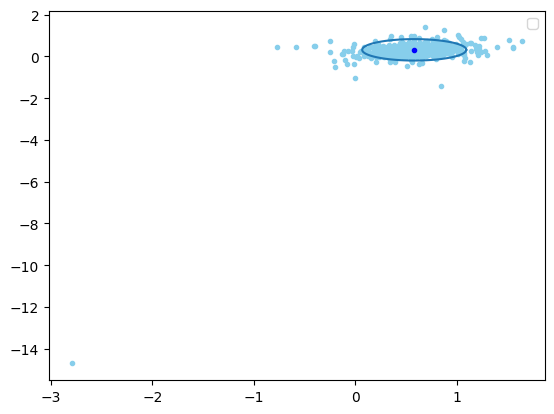

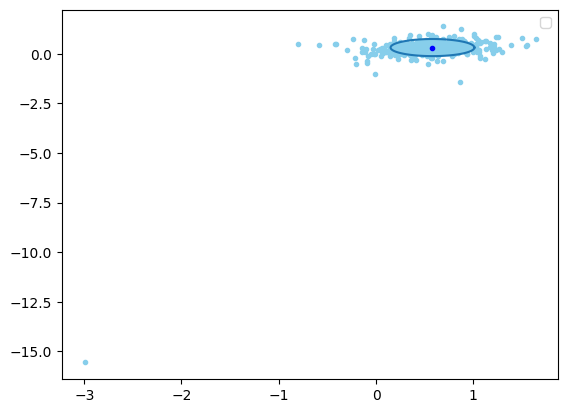

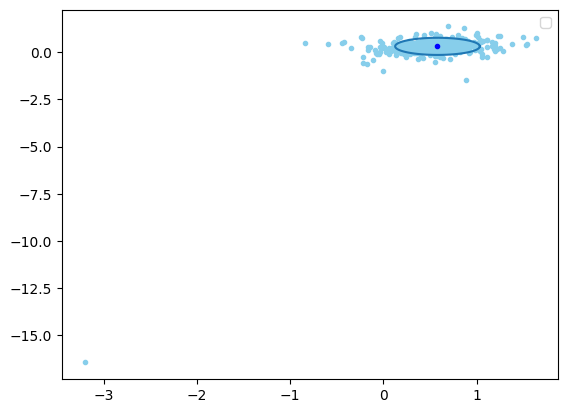

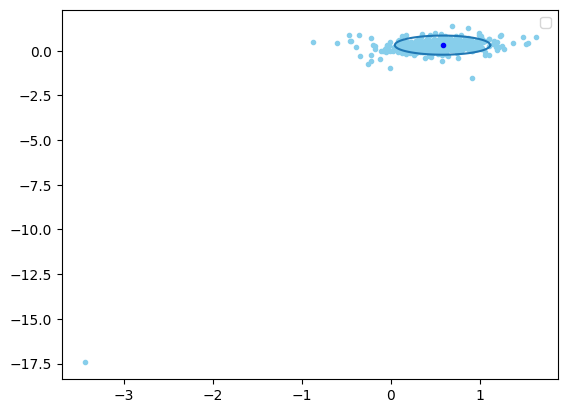

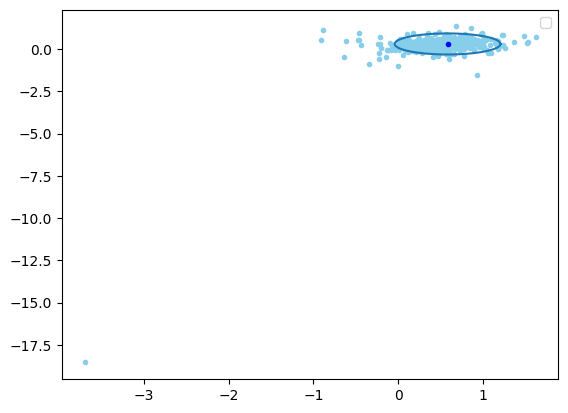

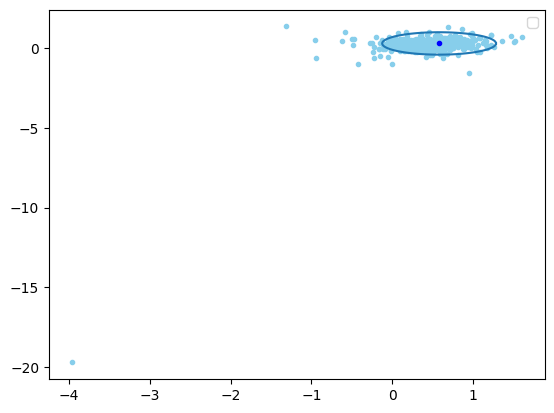

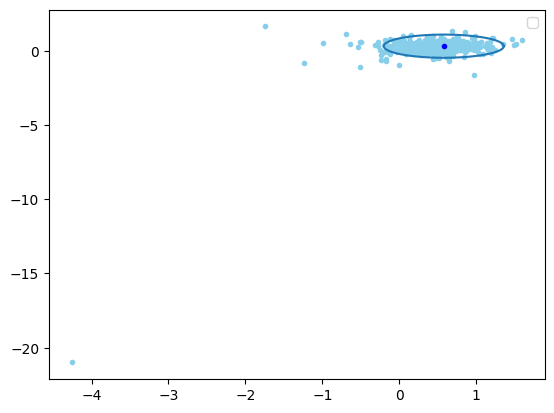

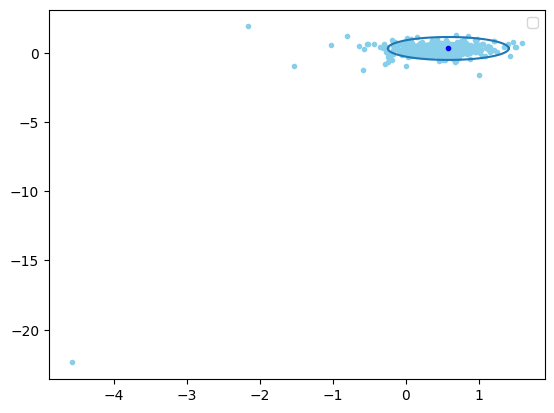

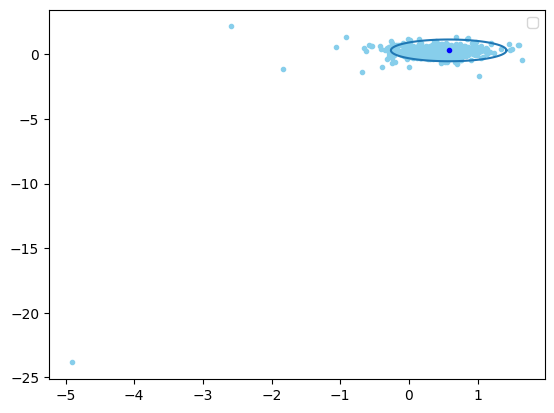

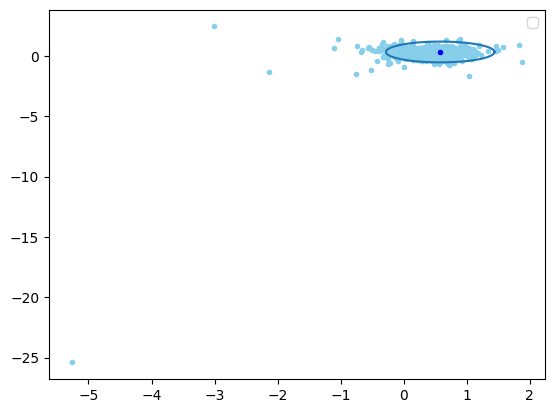

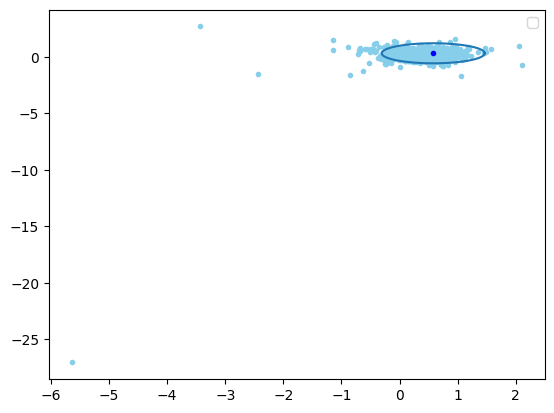

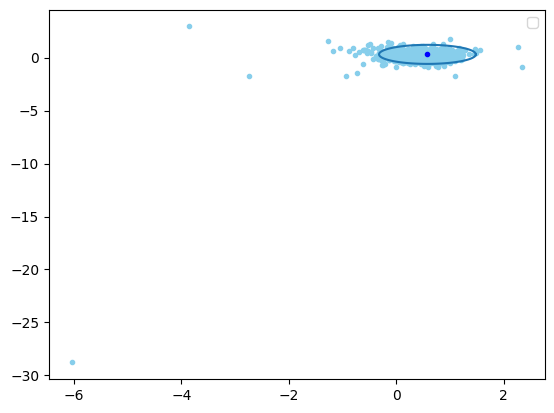

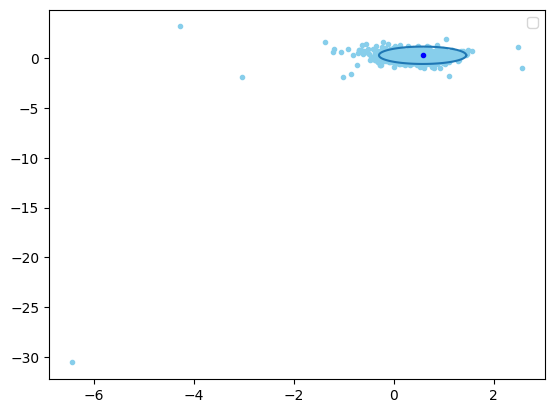

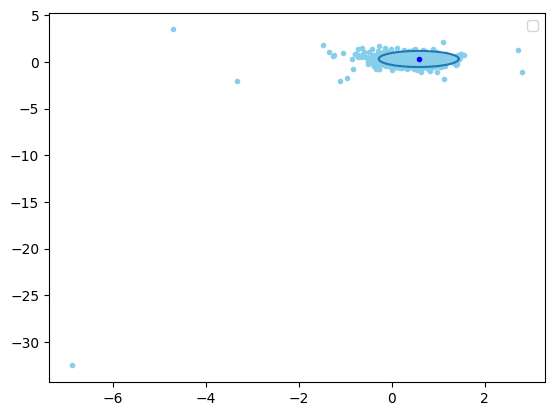

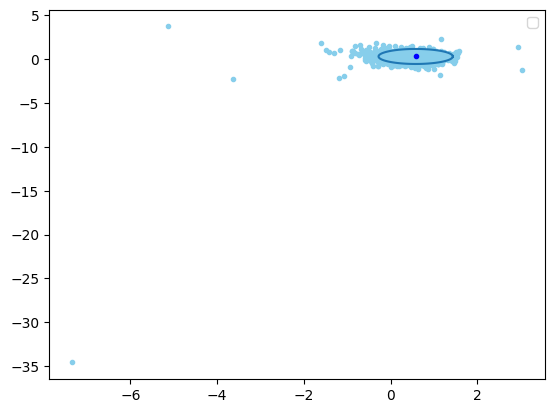

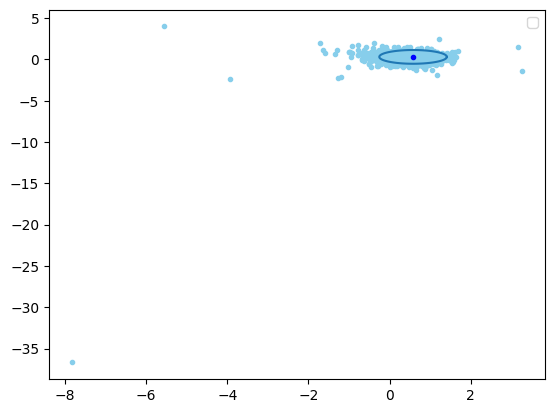

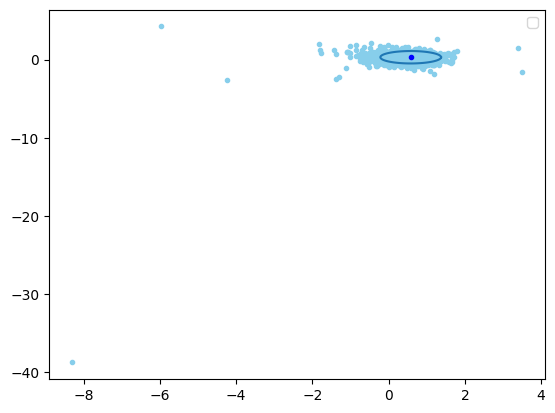

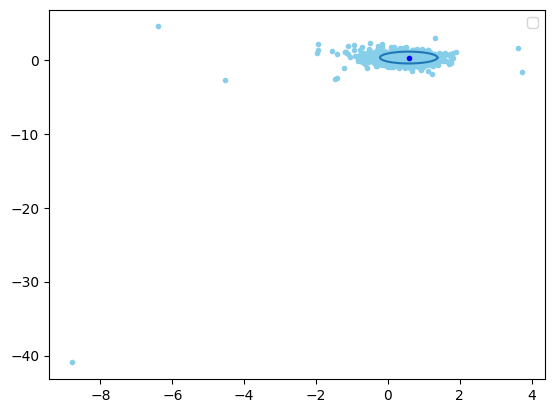

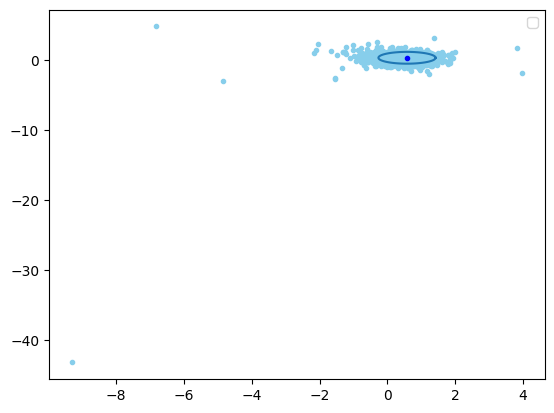

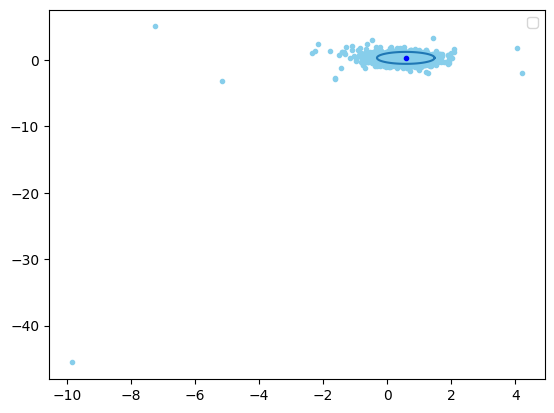

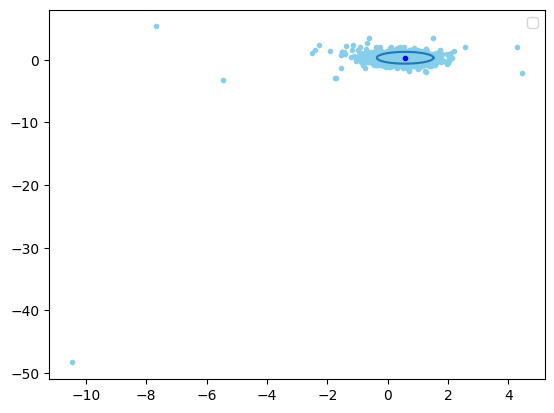

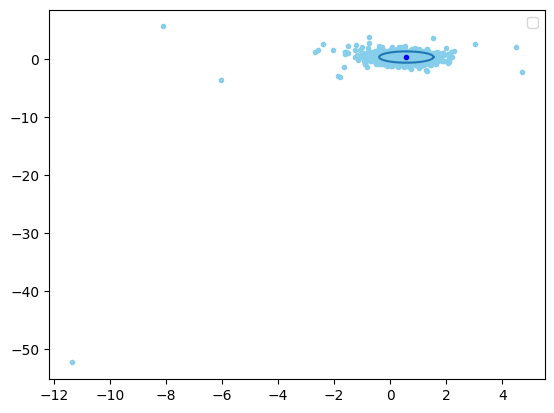

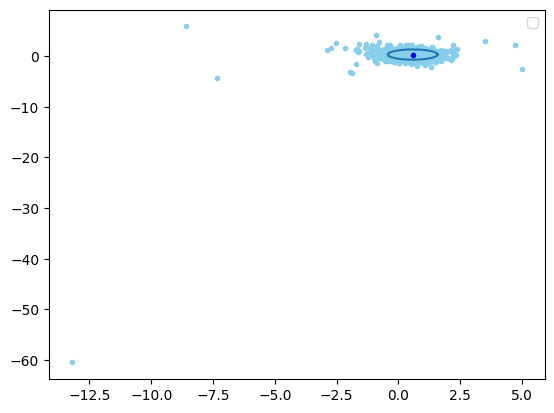

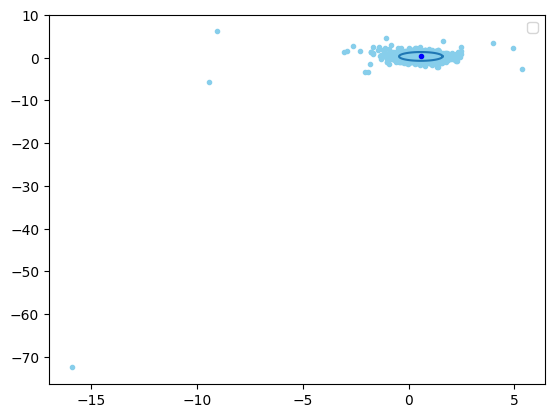

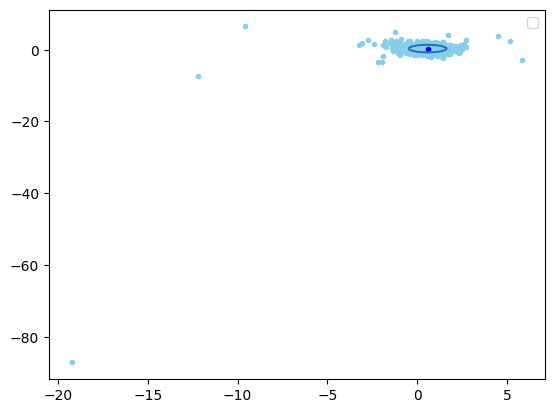

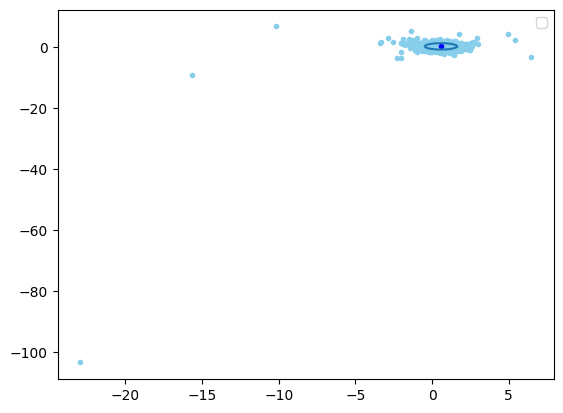

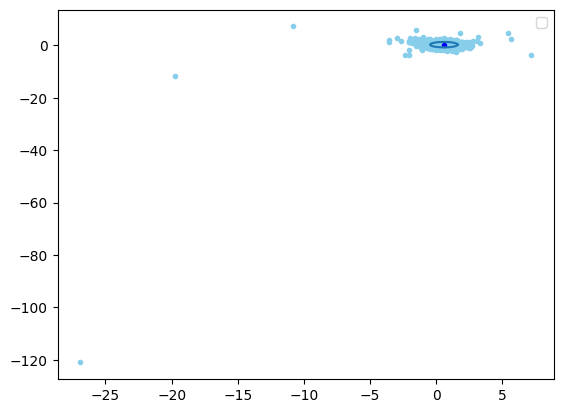

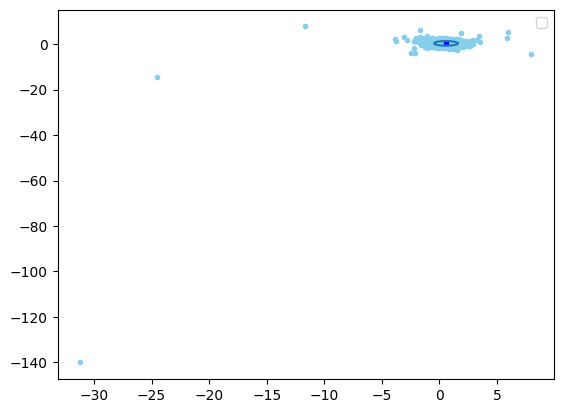

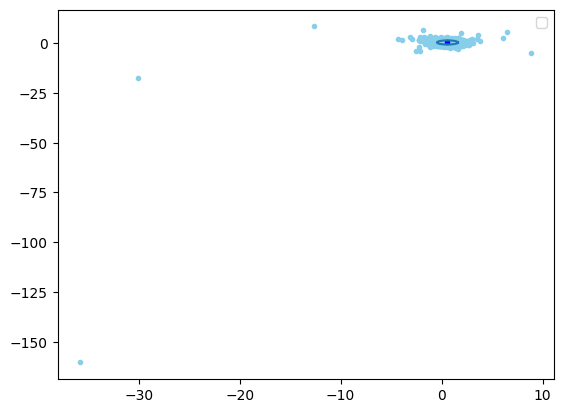

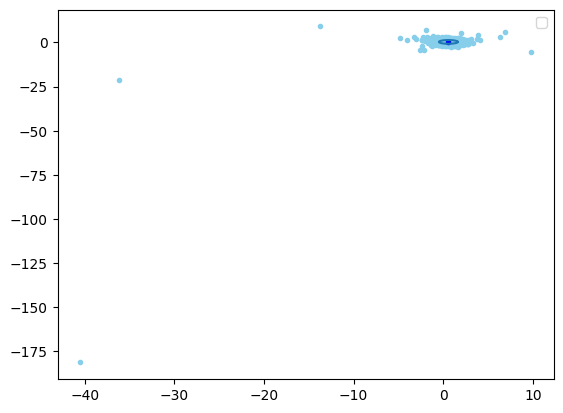

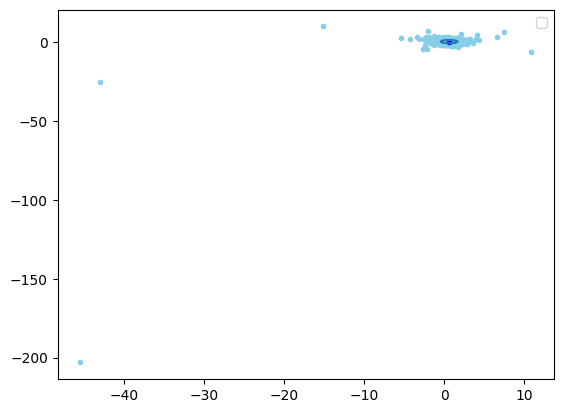

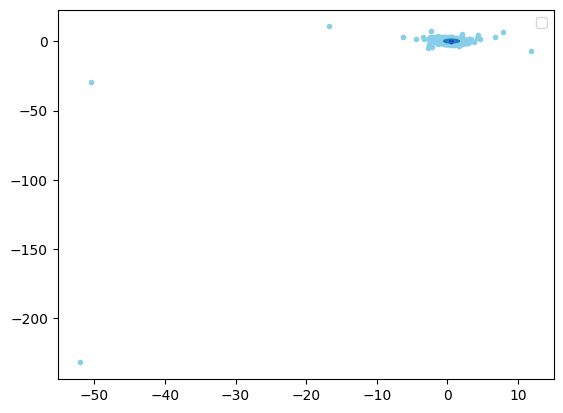

In [28]:
for i in range(0,len(star_data)):
  x= all_list[i].x.value_in(units.parsec)
  y= all_list[i].y.value_in(units.parsec)
  z= all_list[i].z.value_in(units.parsec)
  radioVirial = all_list[i].virial_radius().value_in(units.pc)
  plt.plot(x,y, '.', color='skyblue')
  plt.plot(CMs_all[i][0],CMs_all[i][1], '.', color='blue')
  a = np.linspace(0,np.pi*2,100)
  xr = CMs_all[i][0] + 5*radioVirial*np.cos(a)
  yr = CMs_all[i][1] + 5*radioVirial*np.sin(a)
  plt.plot(xr,yr)
  plt.legend()
  plt.show()

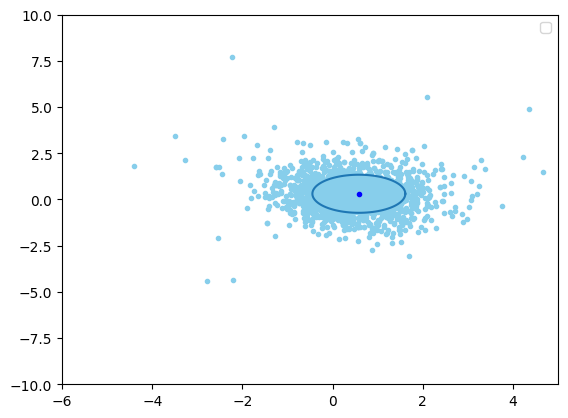

In [38]:
i = 89
x= all_list[i].x.value_in(units.parsec)
y= all_list[i].y.value_in(units.parsec)
z= all_list[i].z.value_in(units.parsec)
radioVirial = all_list[i].virial_radius().value_in(units.pc)
plt.plot(x,y, '.', color='skyblue')
plt.plot(CMs_all[i][0],CMs_all[i][1], '.', color='blue')
a = np.linspace(0,np.pi*2,100)
xr = CMs_all[i][0] + 5*radioVirial*np.cos(a)
yr = CMs_all[i][1] + 5*radioVirial*np.sin(a)
plt.plot(xr,yr)
plt.xlim(-6,5)
plt.ylim(-10,10)
plt.legend()
plt.show()